In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import random
import os
import seaborn as sns

In [ ]:
cap = cv2.VideoCapture("cour_0.mp4")
cap1 = cv2.VideoCapture("cour_1.mp4")


length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
length1 = int(cap1.get(cv2.CAP_PROP_FRAME_COUNT))


print( length )
print( length1)


500
637


In [ ]:
images_enregistrées_A = 0
images_enregistrées_B = 0
count_A= 0
count_B= 0

while True:
    succes_A,frame_A = cap.read()
    succes_B,frame_B = cap1.read()

    nom_A = './SYS809_projet2021_sequences1/courA-' + format (images_enregistrées_A , '02') + '.jpg'
    nom_B = './SYS809_projet2021_sequences1/courB-' + format (images_enregistrées_B , '02') + '.jpg'


    if succes_A == True:
        if count_A % 50 == 0:
            cv2.imwrite(nom_A, frame_A)
            images_enregistrées_A += 1
            print(count_A)

        if succes_B == True:
            if count_B % 50 == 0:
                cv2.imwrite(nom_B, frame_B)
                images_enregistrées_B +=1
                print(count_B)

        if images_enregistrées_A >= 10 and images_enregistrées_B >= 10:
           
           break

        count_A += 1 
        count_B += 1

    else:
        break


cap.release() 
cv2.destroyAllWindows()


0
0
50
50
100
100
150
150
200
200
250
250
300
300
350
350
400
400
450
450


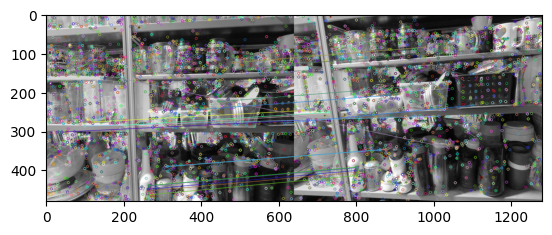

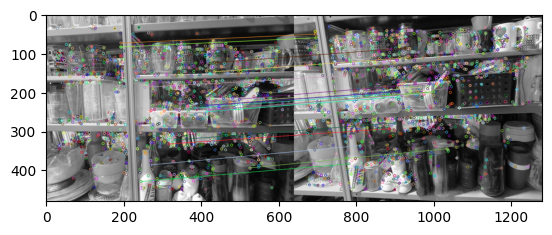

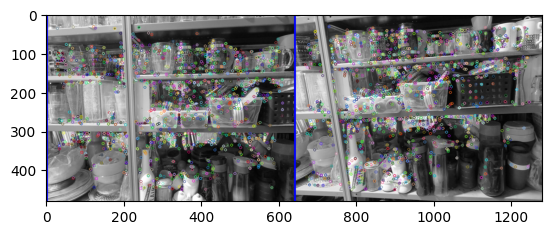

In [4]:

img = cv2.imread('SYS809_projet2021_sequences1/magasinA-04.jpg')
img_a = cv2.imread('SYS809_projet2021_sequences1/magasinB-03.jpg')
gris_A = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gris_B = cv2.cvtColor(img_a, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
kp, des = sift.detectAndCompute(gris_A, None)
kp1, des1 = sift.detectAndCompute(gris_B, None)

img1= cv2.drawKeypoints (gris_A,kp,img)
img2= cv2.drawKeypoints (gris_B,kp1,img_a)

cv2.imwrite ('sift_keypoints.jpg' , img1)
cv2.imwrite ('sift1_keypoints.jpg' , img2)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck= True)
correspondances = bf.match(des,des1)
correspondances = sorted(correspondances, key = lambda x:x.distance)

img12 =cv2.drawMatches (img1,kp,img2,kp1, correspondances[:20], None, flags= cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

akaze = cv2.AKAZE_create()
kp2, des2 = akaze.detectAndCompute(gris_A, None)
kp3, des3 = akaze.detectAndCompute(gris_B, None)

img3= cv2.drawKeypoints (gris_A,kp2,img)
img4= cv2.drawKeypoints (gris_B,kp3,img_a)

cv2.imwrite ('akaze_keypoints.jpg' , img3)
cv2.imwrite ('akaze1_keypoints.jpg' , img4)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck= True)
correspondances = bf.match(des2,des3)
correspondances = sorted(correspondances, key= lambda x:x.distance)

img34 =cv2.drawMatches (img3,kp2,img4,kp3, correspondances[:20], None, flags= cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


harris_A = cv2.cornerHarris(gris_A, blockSize=2, ksize=3, k=0.04)
threshold_A = 0.01 * harris_A.max()
points_A = np.argwhere(harris_A > threshold_A)

harris_B = cv2.cornerHarris(gris_B, blockSize=2, ksize=3, k=0.04)
threshold_B = 0.01 * harris_B.max()
points_B = np.argwhere(harris_B > threshold_B)

for y in range(points_A.shape[0]):
            for x in range(points_A.shape[1]):
                if points_A[y, x]:
                    cv2.circle(img, (x, y), 3, (0, 0, 255), 1) 
                    
for y in range(points_B.shape[0]):
        for x in range(points_B.shape[1]):
                if points_B[y, x]:
                      cv2.circle(img_a, (x, y), 3, (0, 0, 255), 1)

coords_A = np.argwhere(points_A)  
coords_B = np.argwhere(points_B)

keypoints_A = [cv2.KeyPoint(float(pt[1]), float(pt[0]), 3) for pt in coords_A]
keypoints_B = [cv2.KeyPoint(float(pt[1]), float(pt[0]), 3) for pt in coords_B]

orb = cv2.ORB_create()

keypoints_A, des4 = orb.compute(gris_A, keypoints_A)
keypoints_B, des5 = orb.compute(gris_B, keypoints_B)

matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = matcher.match(des4, des5)
matches = sorted(matches, key= lambda x:x.distance)
    
matched_img = cv2.drawMatches(img, keypoints_A, img_a, keypoints_B, matches[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    

    
    
plt.imshow(img12)
plt.show()


plt.imshow(img34)
plt.show()

plt.imshow(matched_img)
plt.show()



SYS809_projet2021_sequences1/legumesA-00.jpg SYS809_projet2021_sequences1/legumesB-00.jpg


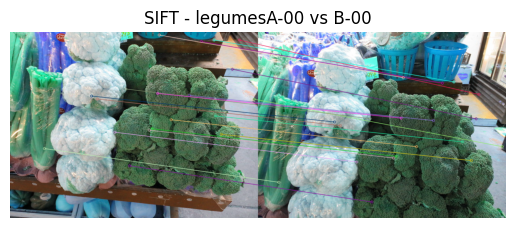

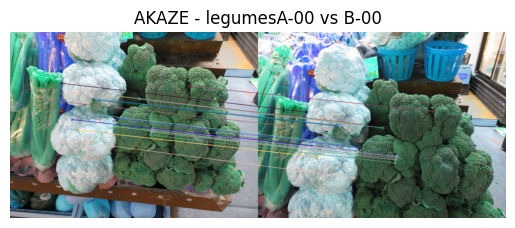

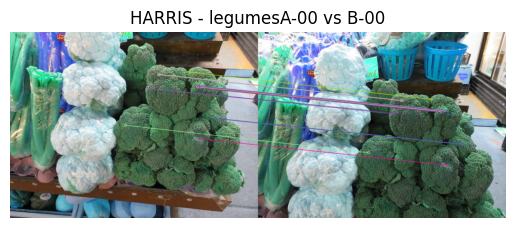

SYS809_projet2021_sequences1/legumesA-00.jpg SYS809_projet2021_sequences1/legumesB-01.jpg
SYS809_projet2021_sequences1/legumesA-00.jpg SYS809_projet2021_sequences1/legumesB-02.jpg
SYS809_projet2021_sequences1/legumesA-00.jpg SYS809_projet2021_sequences1/legumesB-03.jpg
SYS809_projet2021_sequences1/legumesA-00.jpg SYS809_projet2021_sequences1/legumesB-04.jpg
SYS809_projet2021_sequences1/legumesA-00.jpg SYS809_projet2021_sequences1/legumesB-05.jpg
SYS809_projet2021_sequences1/legumesA-00.jpg SYS809_projet2021_sequences1/legumesB-06.jpg
SYS809_projet2021_sequences1/legumesA-00.jpg SYS809_projet2021_sequences1/legumesB-07.jpg
SYS809_projet2021_sequences1/legumesA-00.jpg SYS809_projet2021_sequences1/legumesB-08.jpg
SYS809_projet2021_sequences1/legumesA-00.jpg SYS809_projet2021_sequences1/legumesB-09.jpg
SYS809_projet2021_sequences1/legumesA-01.jpg SYS809_projet2021_sequences1/legumesB-00.jpg
SYS809_projet2021_sequences1/legumesA-01.jpg SYS809_projet2021_sequences1/legumesB-01.jpg
SYS809_pro

In [ ]:
scene_aleatoire = random.choice(["legumes", "neige", "cour", "magasin"])
indice_aleatoire = random.randint(0, 10)

for scene in ["legumes", "neige", "magasin", "cour"]:
    if scene == "magasin":
        max_i = 12
        max_j = 11
    else:
        max_i = 10
        max_j = 10

    for i in range(0, max_i):
        image_A = f"SYS809_projet2021_sequences1/{scene}A-{str(i).zfill(2)}.jpg"
        imgA = cv2.imread(image_A)
        gris_A = cv2.cvtColor(imgA, cv2.COLOR_BGR2GRAY)

        for j in range(0, max_j):  
            image_B = f"SYS809_projet2021_sequences1/{scene}B-{str(j).zfill(2)}.jpg"
            print(image_A, image_B)

            imgB = cv2.imread(image_B)
            gris_B = cv2.cvtColor(imgB, cv2.COLOR_BGR2GRAY)

            # SIFT 
            sift = cv2.SIFT_create()
            kpA_sift, desA_sift = sift.detectAndCompute(gris_A, None)
            kpB_sift, desB_sift = sift.detectAndCompute(gris_B, None)

            matcher_sift = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
            matches_sift = matcher_sift.match(desA_sift, desB_sift)
            matches_sift = sorted(matches_sift, key=lambda x: x.distance)

            sift_matches_img = cv2.drawMatches(
                imgA, kpA_sift, imgB, kpB_sift,
                matches_sift[:20], None,
                flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
            )

            # AKAZE
            akaze = cv2.AKAZE_create()
            kpA_akaze, desA_akaze = akaze.detectAndCompute(gris_A, None)
            kpB_akaze, desB_akaze = akaze.detectAndCompute(gris_B, None)

            matcher_akaze = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
            matches_akaze = matcher_akaze.match(desA_akaze, desB_akaze)
            matches_akaze = sorted(matches_akaze, key=lambda x: x.distance)

            akaze_matches_img = cv2.drawMatches(
                imgA, kpA_akaze, imgB, kpB_akaze,
                matches_akaze[:20], None,
                flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
            )

            # Harris + ORB
            harris_A = cv2.cornerHarris(gris_A, 2, 3, 0.04)
            harris_B = cv2.cornerHarris(gris_B, 2, 3, 0.04)
            threshold_A = 0.01 * harris_A.max()
            threshold_B = 0.01 * harris_B.max()

            points_A = harris_A > threshold_A
            points_B = harris_B > threshold_B
            coords_A = np.argwhere(points_A)
            coords_B = np.argwhere(points_B)

            keypoints_A = [cv2.KeyPoint(float(x), float(y), 3) for y, x in coords_A]
            keypoints_B = [cv2.KeyPoint(float(x), float(y), 3) for y, x in coords_B]

            orb = cv2.ORB_create()
            keypoints_A, desA_orb = orb.compute(gris_A, keypoints_A)
            keypoints_B, desB_orb = orb.compute(gris_B, keypoints_B)

            matcher_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
            matches_orb = matcher_orb.match(desA_orb, desB_orb)
            matches_orb = sorted(matches_orb, key=lambda x: x.distance)

            orb_matches_img = cv2.drawMatches(
                imgA, keypoints_A, imgB, keypoints_B,
                matches_orb[:20], None,
                flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
            )

           
            if scene == scene_aleatoire and i == indice_aleatoire and j == indice_aleatoire:
                plt.figure()
                plt.title(f"SIFT - {scene}A-{str(i).zfill(2)} vs B-{str(j).zfill(2)}")
                plt.imshow(sift_matches_img)
                plt.axis("off")

                plt.figure()
                plt.title(f"AKAZE - {scene}A-{str(i).zfill(2)} vs B-{str(j).zfill(2)}")
                plt.imshow(akaze_matches_img)
                plt.axis("off")

                plt.figure()
                plt.title(f"HARRIS - {scene}A-{str(i).zfill(2)} vs B-{str(j).zfill(2)}")
                plt.imshow(orb_matches_img)
                plt.axis("off")

                plt.show()


In [2]:
matrices_sift = {}
matrices_akaze = {}
matrices_harris = {}

Scène : legumes - A0 vs B0 ➡️ Erreur = 0
Scène : legumes - A1 vs B1 ➡️ Erreur = 0
Scène : legumes - A2 vs B2 ➡️ Erreur = 0
Scène : legumes - A3 vs B3 ➡️ Erreur = 0
Scène : legumes - A4 vs B6 ➡️ Erreur = 2
Scène : legumes - A5 vs B5 ➡️ Erreur = 0
Scène : legumes - A6 vs B6 ➡️ Erreur = 0
Scène : legumes - A7 vs B7 ➡️ Erreur = 0
Scène : legumes - A8 vs B6 ➡️ Erreur = 2
Scène : legumes - A9 vs B6 ➡️ Erreur = 3
legumes - Temps total : 9.65s - Temps moyen par comparaison : 0.0965s


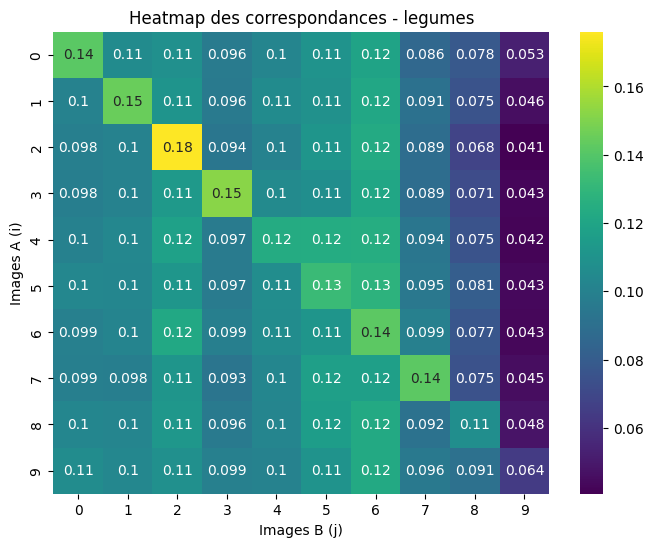

Scène : neige - A0 vs B0 ➡️ Erreur = 0
Scène : neige - A1 vs B1 ➡️ Erreur = 0
Scène : neige - A2 vs B2 ➡️ Erreur = 0
Scène : neige - A3 vs B3 ➡️ Erreur = 0
Scène : neige - A4 vs B4 ➡️ Erreur = 0
Scène : neige - A5 vs B5 ➡️ Erreur = 0
Scène : neige - A6 vs B6 ➡️ Erreur = 0
Scène : neige - A7 vs B7 ➡️ Erreur = 0
Scène : neige - A8 vs B8 ➡️ Erreur = 0
Scène : neige - A9 vs B9 ➡️ Erreur = 0
neige - Temps total : 44.30s - Temps moyen par comparaison : 0.4430s


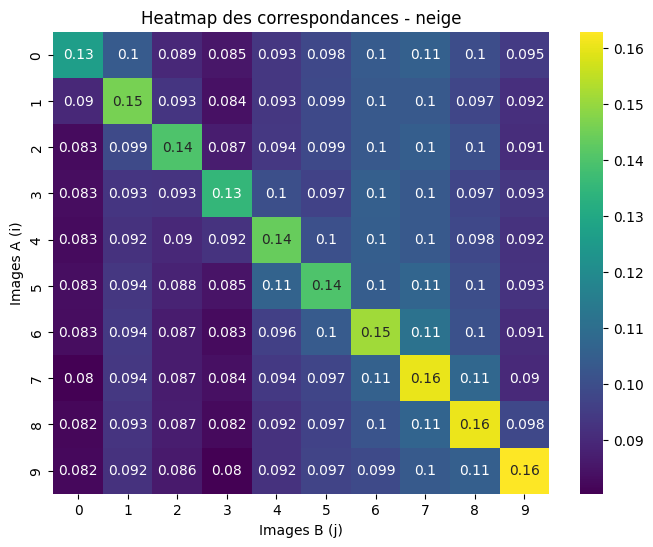

Scène : magasin - A0 vs B0 ➡️ Erreur = 0
Scène : magasin - A1 vs B0 ➡️ Erreur = 1
Scène : magasin - A2 vs B0 ➡️ Erreur = 2
Scène : magasin - A3 vs B0 ➡️ Erreur = 3
Scène : magasin - A4 vs B0 ➡️ Erreur = 4
Scène : magasin - A5 vs B4 ➡️ Erreur = 1
Scène : magasin - A6 vs B5 ➡️ Erreur = 1
Scène : magasin - A7 vs B6 ➡️ Erreur = 1
Scène : magasin - A8 vs B7 ➡️ Erreur = 1
Scène : magasin - A9 vs B8 ➡️ Erreur = 1
Scène : magasin - A10 vs B9 ➡️ Erreur = 1
Scène : magasin - A11 vs B0 ➡️ Erreur = 11
magasin - Temps total : 18.02s - Temps moyen par comparaison : 0.1365s


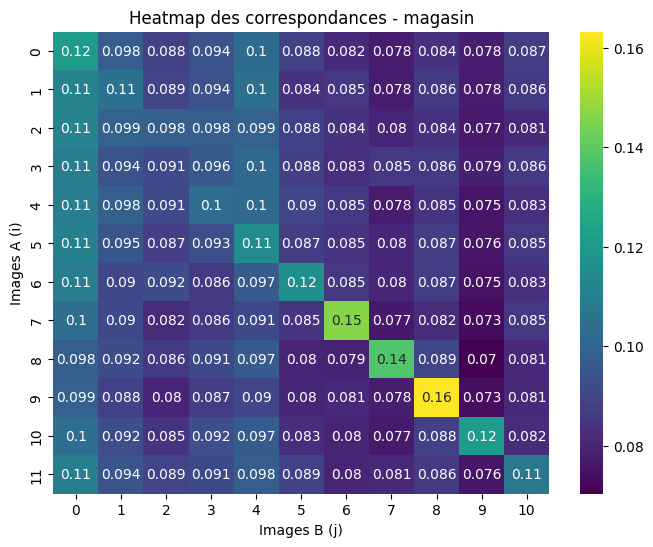

Scène : cour - A0 vs B3 ➡️ Erreur = 3
Scène : cour - A1 vs B1 ➡️ Erreur = 0
Scène : cour - A2 vs B1 ➡️ Erreur = 1
Scène : cour - A3 vs B9 ➡️ Erreur = 6
Scène : cour - A4 vs B9 ➡️ Erreur = 5
Scène : cour - A5 vs B9 ➡️ Erreur = 4
Scène : cour - A6 vs B6 ➡️ Erreur = 0
Scène : cour - A7 vs B9 ➡️ Erreur = 2
Scène : cour - A8 vs B6 ➡️ Erreur = 2
Scène : cour - A9 vs B9 ➡️ Erreur = 0
cour - Temps total : 4.62s - Temps moyen par comparaison : 0.0462s


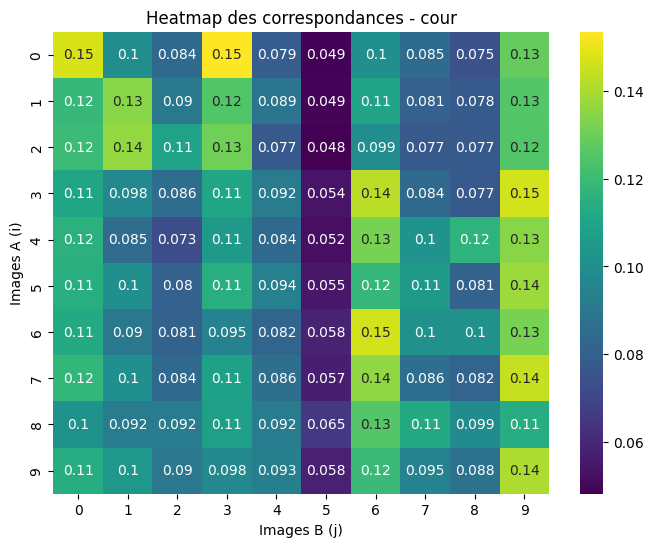

In [ ]:
sift = cv2.SIFT_create()

for scene in ["legumes", "neige", "magasin","cour" ]:
    if scene == "magasin":
        max_i = 12
        max_j = 11
    else:
        max_i = 10
        max_j = 10

    matrice_scores = np.zeros((max_i, max_j))

    start_time = time.time()

    for i in range(0, max_i):  
        image_A = f"SYS809_projet2021_sequences1/{scene}A-{str(i).zfill(2)}.jpg"
        imgA = cv2.imread(image_A)
        gris_A = cv2.cvtColor(imgA, cv2.COLOR_BGR2GRAY)
        kpA, desA = sift.detectAndCompute(gris_A, None)
        kptsA = np.array([kp.pt for kp in kpA])
        np.save(image_A + ".sift.kpts.npy", kptsA)

        scores = []

        for j in range(0, max_j):  
            image_B = f"SYS809_projet2021_sequences1/{scene}B-{str(j).zfill(2)}.jpg"
            imgB = cv2.imread(image_B)
            gris_B = cv2.cvtColor(imgB, cv2.COLOR_BGR2GRAY)
            kpB, desB = sift.detectAndCompute(gris_B, None)
            kptsB = np.array([kp.pt for kp in kpB])
            np.save(image_B + ".sift.kpts.npy", kptsB)

            matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
            matches = matcher.match(desA, desB)

            scores.append(len(matches))  
            matrice_scores[i, j] = len(matches) 
        
        j_max = np.argmax(scores)
        erreur = abs(i - j_max)

        if np.sum(matrice_scores[i, :]) > 0: 
            matrice_scores[i, :] = matrice_scores[i, :] / np.sum(matrice_scores[i, :])

        print(f"Scène : {scene} - A{i} vs B{j_max} ➡️ Erreur = {erreur}")

    end_time = time.time()
    duree_totale = end_time - start_time
    temps_moyen = duree_totale / (max_i * max_j)
    print(f"{scene} - Temps total : {duree_totale:.2f}s - Temps moyen par comparaison : {temps_moyen:.4f}s")
    
    matrices_sift[scene] = matrice_scores
         
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrice_scores, annot=True, cmap="viridis")
    plt.xlabel("Images B (j)")
    plt.ylabel("Images A (i)")
    plt.title(f"Heatmap des correspondances - {scene}")
    plt.show()



In [184]:
for scene in ["legumes", "neige", "magasin", "cour"]:
    matrice = matrices_sift[scene]  

    erreurs = []
    for i in range(matrice.shape[0]):
        j_max = np.argmax(matrice[i, :])
        erreur = abs(i - j_max)
        erreurs.append(erreur)
    
    print(f"{scene} - Erreur moyenne SIFT : {np.mean(erreurs):.2f}")


legumes - Erreur moyenne SIFT : 0.70
neige - Erreur moyenne SIFT : 0.00
magasin - Erreur moyenne SIFT : 2.25
cour - Erreur moyenne SIFT : 2.30


In [ ]:
def charger_image(path):
    img = cv2.imread(path)
    if img is None:
        print(f" Image introuvable : {path}")
        return None
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def score_similarite_sift(img_cible, img1, img2):
    sift = cv2.SIFT_create()
    kp_cible, des_cible = sift.detectAndCompute(img_cible, None)
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    score = 0

    if des_cible is not None and des1 is not None:
        matches1 = bf.match(des_cible, des1)
        score += sum([m.distance for m in matches1]) / len(matches1) if matches1 else 1e6
    else:
        score += 1e6

    if des_cible is not None and des2 is not None:
        matches2 = bf.match(des_cible, des2)
        score += sum([m.distance for m in matches2]) / len(matches2) if matches2 else 1e6
    else:
        score += 1e6

    return score


dossier = "SYS809_projet2021_sequences1"
scene = "magasin"  
max_index = 10


i_cible = random.randint(1, max_index - 2)
img_cible_path = f"{dossier}/{scene}A-{str(i_cible).zfill(2)}.jpg"
img_cible = charger_image(img_cible_path)

print(f" Image cible : {scene}A-{str(i_cible).zfill(2)}.jpg")


images_A = []
indices_A = []

images_B = []
indices_B = []

for i in range(max_index):
    if i != i_cible:
        path_A = f"{dossier}/{scene}A-{str(i).zfill(2)}.jpg"
        path_B = f"{dossier}/{scene}B-{str(i).zfill(2)}.jpg"

        img_A = charger_image(path_A)
        img_B = charger_image(path_B)

        if img_A is not None:
            images_A.append(img_A)
            indices_A.append(i)

        if img_B is not None:
            images_B.append(img_B)
            indices_B.append(i)


scores_A = []
paires_A = []

for j in range(len(images_A) - 1):
    i1 = indices_A[j]
    i2 = indices_A[j + 1]

    score = score_similarite_sift(img_cible, images_A[j], images_A[j + 1])
    scores_A.append(score)
    paires_A.append((i1, i2))


scores_B = []
paires_B = []

for j in range(len(images_B) - 1):
    i1 = indices_B[j]
    i2 = indices_B[j + 1]

    score = score_similarite_sift(img_cible, images_B[j], images_B[j + 1])
    scores_B.append(score)
    paires_B.append((i1, i2))


if scores_A:
    idx_A = np.argmin(scores_A)
    j1_A, j2_A = paires_A[idx_A]
    estimation_A = j2_A

    if j1_A < i_cible < j2_A:
        erreur_A = 0
    else:
        erreur_A = min(abs(i_cible - j1_A), abs(i_cible - j2_A))
else:
    estimation_A = None
    erreur_A = None

if scores_B:
    idx_B = np.argmin(scores_B)
    j1_B, j2_B = paires_B[idx_B]
    estimation_B = j2_B

    if j1_B < i_cible < j2_B:
        erreur_B = 0
    else:
        erreur_B = min(abs(i_cible - j1_B), abs(i_cible - j2_B))
else:
    estimation_B = None
    erreur_B = None


print("\n Résultat de l'insertion logique :")
print(f" Position réelle de l’image cible : A-{str(i_cible).zfill(2)}")

if estimation_A is not None:
    print(f" Insertion estimée dans A : entre A-{str(j1_A).zfill(2)} et A-{str(j2_A).zfill(2)}")
    print(f"   Erreur (A) = {erreur_A}")
else:
    print(" Insertion dans A : impossible à estimer")

if estimation_B is not None:
    print(f" Insertion estimée dans B : entre B-{str(j1_B).zfill(2)} et B-{str(j2_B).zfill(2)}")
    print(f"   Erreur (B) = {erreur_B}")
else:
    print(" Insertion dans B : impossible à estimer")


 Image cible : magasinA-05.jpg

 Résultat de l'insertion logique :
 Position réelle de l’image cible : A-05
 Insertion estimée dans A : entre A-06 et A-07
   Erreur (A) = 1
 Insertion estimée dans B : entre B-03 et B-04
   Erreur (B) = 1


Scène : legumes - A0 vs B0 ➡️ Erreur = 0
Scène : legumes - A1 vs B1 ➡️ Erreur = 0
Scène : legumes - A2 vs B2 ➡️ Erreur = 0
Scène : legumes - A3 vs B3 ➡️ Erreur = 0
Scène : legumes - A4 vs B4 ➡️ Erreur = 0
Scène : legumes - A5 vs B5 ➡️ Erreur = 0
Scène : legumes - A6 vs B6 ➡️ Erreur = 0
Scène : legumes - A7 vs B7 ➡️ Erreur = 0
Scène : legumes - A8 vs B8 ➡️ Erreur = 0
Scène : legumes - A9 vs B6 ➡️ Erreur = 3
legumes - Temps total : 4.53s - Temps moyen par comparaison : 0.0453s


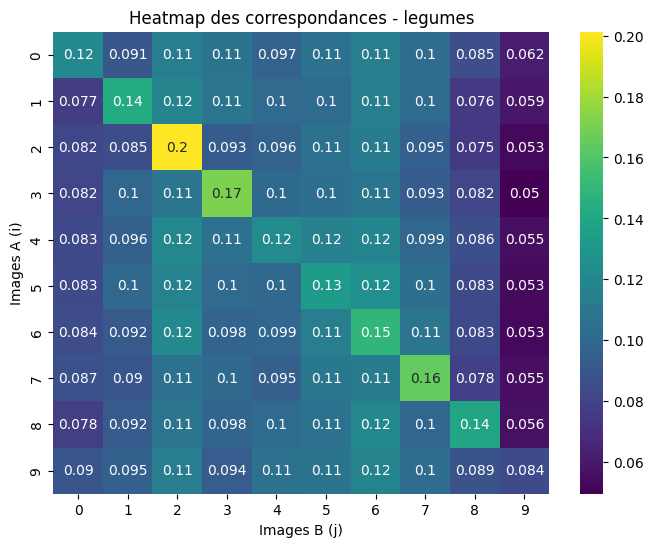

Scène : neige - A0 vs B0 ➡️ Erreur = 0
Scène : neige - A1 vs B1 ➡️ Erreur = 0
Scène : neige - A2 vs B2 ➡️ Erreur = 0
Scène : neige - A3 vs B3 ➡️ Erreur = 0
Scène : neige - A4 vs B4 ➡️ Erreur = 0
Scène : neige - A5 vs B5 ➡️ Erreur = 0
Scène : neige - A6 vs B6 ➡️ Erreur = 0
Scène : neige - A7 vs B7 ➡️ Erreur = 0
Scène : neige - A8 vs B8 ➡️ Erreur = 0
Scène : neige - A9 vs B9 ➡️ Erreur = 0
neige - Temps total : 5.09s - Temps moyen par comparaison : 0.0509s


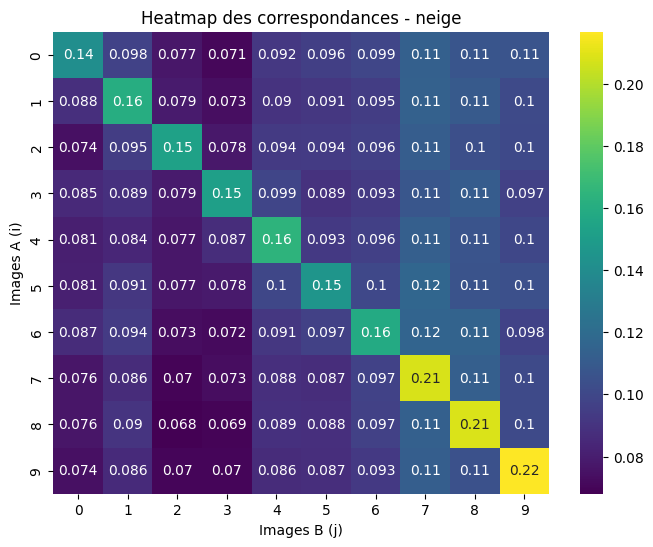

Scène : magasin - A0 vs B2 ➡️ Erreur = 2
Scène : magasin - A1 vs B1 ➡️ Erreur = 0
Scène : magasin - A2 vs B2 ➡️ Erreur = 0
Scène : magasin - A3 vs B3 ➡️ Erreur = 0
Scène : magasin - A4 vs B3 ➡️ Erreur = 1
Scène : magasin - A5 vs B4 ➡️ Erreur = 1
Scène : magasin - A6 vs B5 ➡️ Erreur = 1
Scène : magasin - A7 vs B6 ➡️ Erreur = 1
Scène : magasin - A8 vs B7 ➡️ Erreur = 1
Scène : magasin - A9 vs B8 ➡️ Erreur = 1
Scène : magasin - A10 vs B9 ➡️ Erreur = 1
Scène : magasin - A11 vs B10 ➡️ Erreur = 1
magasin - Temps total : 6.12s - Temps moyen par comparaison : 0.0464s


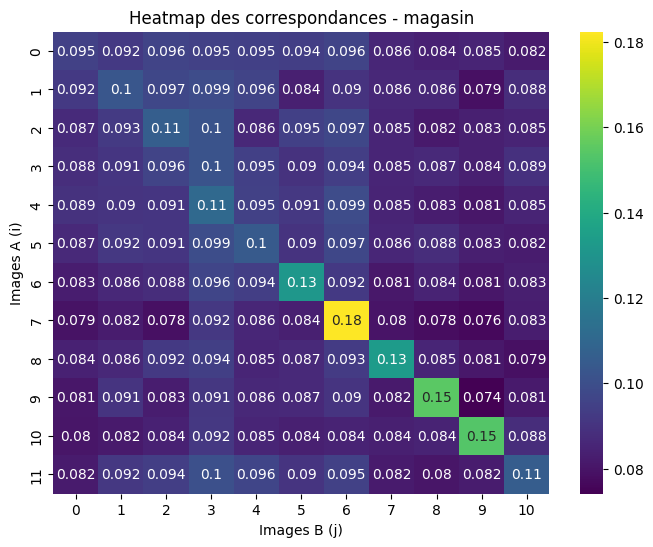

Scène : cour - A0 vs B0 ➡️ Erreur = 0
Scène : cour - A1 vs B9 ➡️ Erreur = 8
Scène : cour - A2 vs B9 ➡️ Erreur = 7
Scène : cour - A3 vs B9 ➡️ Erreur = 6
Scène : cour - A4 vs B9 ➡️ Erreur = 5
Scène : cour - A5 vs B9 ➡️ Erreur = 4
Scène : cour - A6 vs B6 ➡️ Erreur = 0
Scène : cour - A7 vs B9 ➡️ Erreur = 2
Scène : cour - A8 vs B0 ➡️ Erreur = 8
Scène : cour - A9 vs B9 ➡️ Erreur = 0
cour - Temps total : 2.24s - Temps moyen par comparaison : 0.0224s


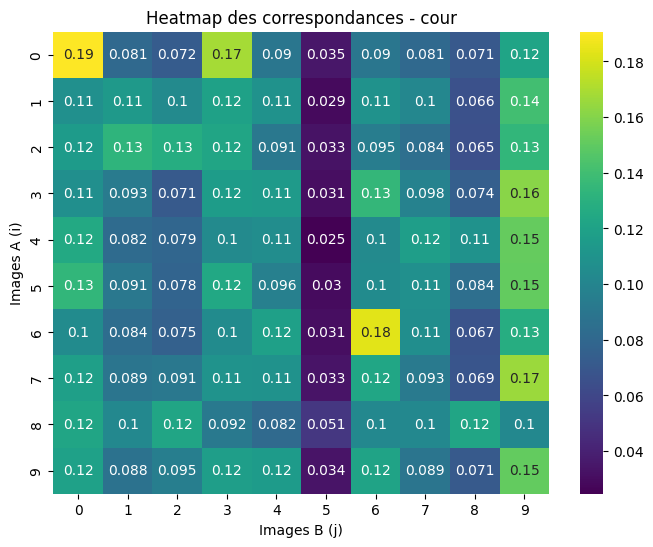

In [ ]:
akaze = cv2.AKAZE_create()

for scene in ["legumes", "neige", "magasin","cour" ]:
    if scene == "magasin":
        max_i = 12
        max_j = 11
    else:
        max_i = 10
        max_j = 10

    matrice_scores = np.zeros((max_i, max_j))

    start_time = time.time()

    for i in range(0, max_i):  
        image_A = f"SYS809_projet2021_sequences1/{scene}A-{str(i).zfill(2)}.jpg"
        imgA = cv2.imread(image_A)
        gris_A = cv2.cvtColor(imgA, cv2.COLOR_BGR2GRAY)
        kpA, desA = akaze.detectAndCompute(gris_A, None)
        scores = []

        for j in range(0, max_j): 
            image_B = f"SYS809_projet2021_sequences1/{scene}B-{str(j).zfill(2)}.jpg"  
            imgB = cv2.imread(image_B)
            gris_B = cv2.cvtColor(imgB, cv2.COLOR_BGR2GRAY)
            kpB, desB = akaze.detectAndCompute(gris_B, None)

            matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
            matches = matcher.match(desA, desB)

            scores.append(len(matches)) 
            matrice_scores[i, j] = len(matches)  
        
        j_max = np.argmax(scores)  
        erreur = abs(i - j_max)    

        if np.sum(matrice_scores[i, :]) > 0:  
            matrice_scores[i, :] = matrice_scores[i, :] / np.sum(matrice_scores[i, :])

        print(f"Scène : {scene} - A{i} vs B{j_max} ➡️ Erreur = {erreur}")

    end_time = time.time()
    duree_totale = end_time - start_time
    temps_moyen = duree_totale / (max_i * max_j)
    print(f"{scene} - Temps total : {duree_totale:.2f}s - Temps moyen par comparaison : {temps_moyen:.4f}s")
    
    matrices_akaze[scene] = matrice_scores
         
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrice_scores, annot=True, cmap="viridis")
    plt.xlabel("Images B (j)")
    plt.ylabel("Images A (i)")
    plt.title(f"Heatmap des correspondances - {scene}")
    plt.show()

In [186]:
for scene in ["legumes", "neige", "magasin", "cour"]:
    matrice = matrices_akaze[scene]  

    erreurs = []
    for i in range(matrice.shape[0]):
        j_max = np.argmax(matrice[i, :])
        erreur = abs(i - j_max)
        erreurs.append(erreur)
    
    print(f"{scene} - Erreur moyenne Akaze : {np.mean(erreurs):.2f}")

legumes - Erreur moyenne Akaze : 0.30
neige - Erreur moyenne Akaze : 0.00
magasin - Erreur moyenne Akaze : 0.83
cour - Erreur moyenne Akaze : 4.00


In [4]:
def charger_image(path):
    img = cv2.imread(path)
    if img is None:
        print(f" Image introuvable : {path}")
        return None
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def score_similarite_akaze(img_cible, img1, img2):
    akaze = cv2.AKAZE_create()
    kp_cible, des_cible = akaze.detectAndCompute(img_cible, None)
    kp1, des1 = akaze.detectAndCompute(img1, None)
    kp2, des2 = akaze.detectAndCompute(img2, None)

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    score = 0

    if des_cible is not None and des1 is not None:
        matches1 = bf.match(des_cible, des1)
        score += sum([m.distance for m in matches1]) / len(matches1) if matches1 else 1e6
    else:
        score += 1e6

    if des_cible is not None and des2 is not None:
        matches2 = bf.match(des_cible, des2)
        score += sum([m.distance for m in matches2]) / len(matches2) if matches2 else 1e6
    else:
        score += 1e6

    return score


dossier = "SYS809_projet2021_sequences1"
scene = "magasin" 
max_index = 10


i_cible = random.randint(1, max_index - 2)
img_cible_path = f"{dossier}/{scene}A-{str(i_cible).zfill(2)}.jpg"
img_cible = charger_image(img_cible_path)

print(f" Image cible : {scene}A-{str(i_cible).zfill(2)}.jpg")


images_A = []
indices_A = []

images_B = []
indices_B = []

for i in range(max_index):
    if i != i_cible:
        path_A = f"{dossier}/{scene}A-{str(i).zfill(2)}.jpg"
        path_B = f"{dossier}/{scene}B-{str(i).zfill(2)}.jpg"

        img_A = charger_image(path_A)
        img_B = charger_image(path_B)

        if img_A is not None:
            images_A.append(img_A)
            indices_A.append(i)

        if img_B is not None:
            images_B.append(img_B)
            indices_B.append(i)


scores_A = []
paires_A = []

for j in range(len(images_A) - 1):
    i1 = indices_A[j]
    i2 = indices_A[j + 1]

    score = score_similarite_akaze(img_cible, images_A[j], images_A[j + 1])
    paires_A.append((i1, i2))
    scores_A.append(score)


scores_B = []
paires_B = []

for j in range(len(images_B) - 1):
    i1 = indices_B[j]
    i2 = indices_B[j + 1]

    score = score_similarite_akaze(img_cible, images_B[j], images_B[j + 1])
    paires_B.append((i1, i2))
    scores_B.append(score)


if scores_A:
    idx_A = np.argmin(scores_A)
    j1_A, j2_A = paires_A[idx_A]
    estimation_A = j2_A

    if j1_A < i_cible < j2_A:
        erreur_A = 0
    else:
        erreur_A = min(abs(i_cible - j1_A), abs(i_cible - j2_A))
else:
    estimation_A = None
    erreur_A = None

if scores_B:
    idx_B = np.argmin(scores_B)
    j1_B, j2_B = paires_B[idx_B]
    estimation_B = j2_B

    if j1_B < i_cible < j2_B:
        erreur_B = 0
    else:
        erreur_B = min(abs(i_cible - j1_B), abs(i_cible - j2_B))
else:
    estimation_B = None
    erreur_B = None


print("\n Résultat de l'insertion logique (AKAZE) :")
print(f"  Position réelle de l’image cible : A-{str(i_cible).zfill(2)}")

if estimation_A is not None:
    print(f" Insertion estimée dans A : entre A-{str(j1_A).zfill(2)} et A-{str(j2_A).zfill(2)}")
    print(f"    Erreur (A) = {erreur_A}")
else:
    print(" Insertion dans A : impossible à estimer")

if estimation_B is not None:
    print(f" Insertion estimée dans B : entre B-{str(j1_B).zfill(2)} et B-{str(j2_B).zfill(2)}")
    print(f"  Erreur (B) = {erreur_B}")
else:
    print(" Insertion dans B : impossible à estimer")


 Image cible : magasinA-04.jpg

 Résultat de l'insertion logique (AKAZE) :
  Position réelle de l’image cible : A-04
 Insertion estimée dans A : entre A-03 et A-05
    Erreur (A) = 0
 Insertion estimée dans B : entre B-02 et B-03
  Erreur (B) = 1


Scène : legumes - A0 vs B0 ➡️ Erreur = 0
Scène : legumes - A1 vs B1 ➡️ Erreur = 0
Scène : legumes - A2 vs B2 ➡️ Erreur = 0
Scène : legumes - A3 vs B3 ➡️ Erreur = 0
Scène : legumes - A4 vs B1 ➡️ Erreur = 3
Scène : legumes - A5 vs B5 ➡️ Erreur = 0
Scène : legumes - A6 vs B0 ➡️ Erreur = 6
Scène : legumes - A7 vs B7 ➡️ Erreur = 0
Scène : legumes - A8 vs B8 ➡️ Erreur = 0
Scène : legumes - A9 vs B9 ➡️ Erreur = 0
legumes - Temps total : 0.72s - Temps moyen par comparaison : 0.0072s


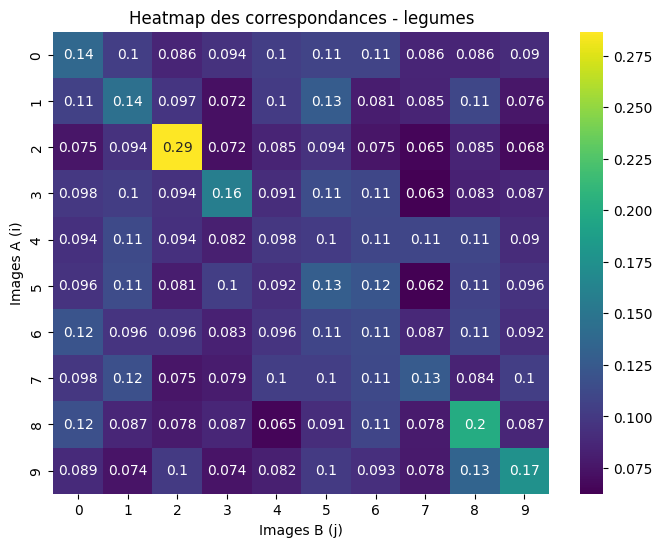

Scène : neige - A0 vs B0 ➡️ Erreur = 0
Scène : neige - A1 vs B1 ➡️ Erreur = 0
Scène : neige - A2 vs B2 ➡️ Erreur = 0
Scène : neige - A3 vs B3 ➡️ Erreur = 0
Scène : neige - A4 vs B4 ➡️ Erreur = 0
Scène : neige - A5 vs B5 ➡️ Erreur = 0
Scène : neige - A6 vs B6 ➡️ Erreur = 0
Scène : neige - A7 vs B7 ➡️ Erreur = 0
Scène : neige - A8 vs B8 ➡️ Erreur = 0
Scène : neige - A9 vs B9 ➡️ Erreur = 0
neige - Temps total : 0.93s - Temps moyen par comparaison : 0.0093s


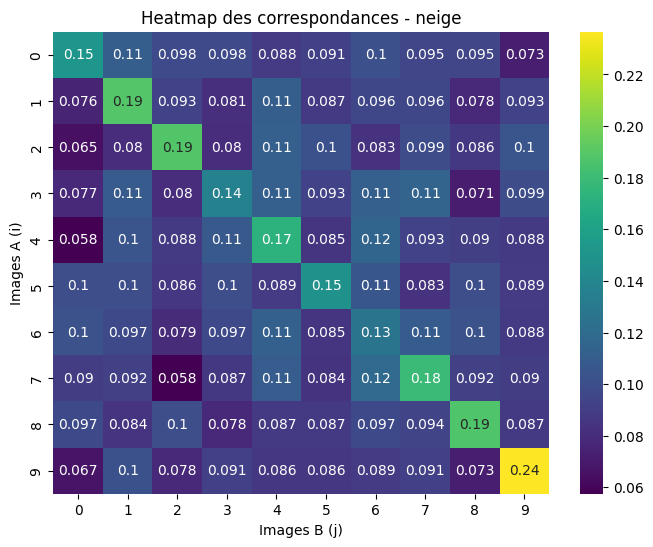

Scène : magasin - A0 vs B0 ➡️ Erreur = 0
Scène : magasin - A1 vs B7 ➡️ Erreur = 6
Scène : magasin - A2 vs B3 ➡️ Erreur = 1
Scène : magasin - A3 vs B3 ➡️ Erreur = 0
Scène : magasin - A4 vs B3 ➡️ Erreur = 1
Scène : magasin - A5 vs B2 ➡️ Erreur = 3
Scène : magasin - A6 vs B2 ➡️ Erreur = 4
Scène : magasin - A7 vs B6 ➡️ Erreur = 1
Scène : magasin - A8 vs B7 ➡️ Erreur = 1
Scène : magasin - A9 vs B8 ➡️ Erreur = 1
Scène : magasin - A10 vs B9 ➡️ Erreur = 1
Scène : magasin - A11 vs B3 ➡️ Erreur = 8
magasin - Temps total : 0.92s - Temps moyen par comparaison : 0.0069s


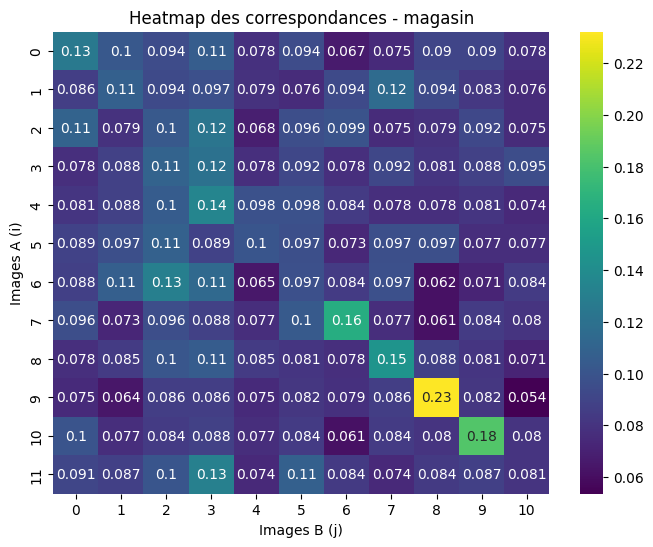

Scène : cour - A0 vs B0 ➡️ Erreur = 0
Scène : cour - A1 vs B9 ➡️ Erreur = 8
Scène : cour - A2 vs B2 ➡️ Erreur = 0
Scène : cour - A3 vs B2 ➡️ Erreur = 1
Scène : cour - A4 vs B4 ➡️ Erreur = 0
Scène : cour - A5 vs B9 ➡️ Erreur = 4
Scène : cour - A6 vs B1 ➡️ Erreur = 5
Scène : cour - A7 vs B4 ➡️ Erreur = 3
Scène : cour - A8 vs B0 ➡️ Erreur = 8
Scène : cour - A9 vs B3 ➡️ Erreur = 6
cour - Temps total : 0.45s - Temps moyen par comparaison : 0.0045s


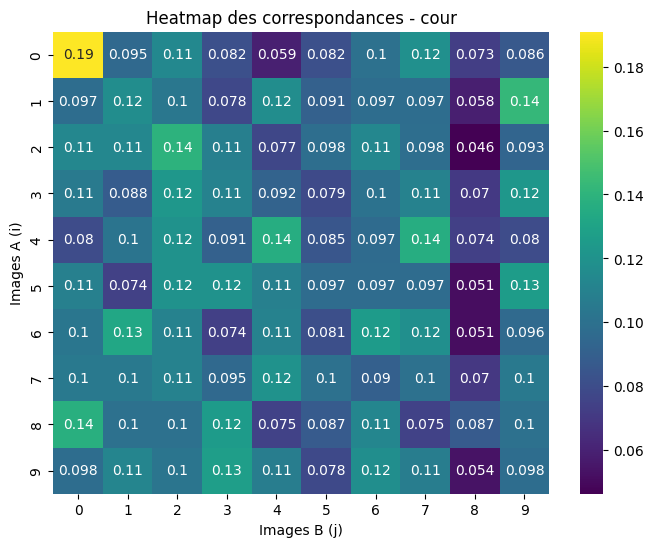

In [ ]:
orb = cv2.ORB_create()
matrices_harris = {}

for scene in ["legumes", "neige", "magasin", "cour"]:
    if scene == "magasin":
        max_i = 12
        max_j = 11
    else:
        max_i = 10
        max_j = 10

    matrice_scores = np.zeros((max_i, max_j))
    start_time = time.time()

    for i in range(max_i):
        image_A = f"SYS809_projet2021_sequences1/{scene}A-{str(i).zfill(2)}.jpg"
        imgA = cv2.imread(image_A)
        gris_A = cv2.cvtColor(imgA, cv2.COLOR_BGR2GRAY)

        # Harris A{i}
        harris_A = cv2.cornerHarris(gris_A, blockSize=2, ksize=3, k=0.04)
        threshold_A = 0.01 * harris_A.max()
        points_A = np.argwhere(harris_A > threshold_A)
        scores_A = harris_A[points_A[:, 0], points_A[:, 1]]
        top_idx_A = np.argsort(scores_A)[-150:]
        points_A = points_A[top_idx_A]
        keypoints_A = [cv2.KeyPoint(float(p[1]), float(p[0]), 1) for p in points_A]
        keypoints_A, desA = orb.compute(gris_A, keypoints_A)

        scores = []

        for j in range(max_j):
            image_B = f"SYS809_projet2021_sequences1/{scene}B-{str(j).zfill(2)}.jpg"
            imgB = cv2.imread(image_B)
            gris_B = cv2.cvtColor(imgB, cv2.COLOR_BGR2GRAY)

            # Harris B{j}
            harris_B = cv2.cornerHarris(gris_B, blockSize=2, ksize=3, k=0.04)
            threshold_B = 0.01 * harris_B.max()
            points_B = np.argwhere(harris_B > threshold_B)
            scores_B = harris_B[points_B[:, 0], points_B[:, 1]]
            top_idx_B = np.argsort(scores_B)[-150:]
            points_B = points_B[top_idx_B]
            keypoints_B = [cv2.KeyPoint(float(p[1]), float(p[0]), 1) for p in points_B]
            keypoints_B, desB = orb.compute(gris_B, keypoints_B)

            # Matching ORB
            if desA is not None and desB is not None:
                matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
                matches = matcher.match(desA, desB)
                nb_matches = len(matches)
            else:
                nb_matches = 0

            scores.append(nb_matches)
            matrice_scores[i, j] = nb_matches

        j_max = np.argmax(scores)
        erreur = abs(i - j_max)

        if np.sum(matrice_scores[i, :]) > 0:
            matrice_scores[i, :] = matrice_scores[i, :] / np.sum(matrice_scores[i, :])

        print(f"Scène : {scene} - A{i} vs B{j_max} ➡️ Erreur = {erreur}")

    end_time = time.time()
    duree_totale = end_time - start_time
    temps_moyen = duree_totale / (max_i * max_j)
    print(f"{scene} - Temps total : {duree_totale:.2f}s - Temps moyen par comparaison : {temps_moyen:.4f}s")

    matrices_harris[scene] = matrice_scores

    plt.figure(figsize=(8, 6))
    sns.heatmap(matrice_scores, annot=True, cmap="viridis")
    plt.xlabel("Images B (j)")
    plt.ylabel("Images A (i)")
    plt.title(f"Heatmap des correspondances - {scene}")
    plt.show()


In [5]:
for scene in ["legumes", "neige", "magasin", "cour"]:
    matrice = matrices_harris[scene]  

    erreurs = []
    for i in range(matrice.shape[0]):
        j_max = np.argmax(matrice[i, :])
        erreur = abs(i - j_max)
        erreurs.append(erreur)
    
    print(f"{scene} - Erreur moyenne Harris : {np.mean(erreurs):.2f}")

legumes - Erreur moyenne Harris : 0.90
neige - Erreur moyenne Harris : 0.00
magasin - Erreur moyenne Harris : 2.25
cour - Erreur moyenne Harris : 3.50


In [5]:
def charger_image(path):
    img = cv2.imread(path)
    if img is None:
        print(f" Image introuvable : {path}")
        return None
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def harris_orb_descriptors(img):
    gray = np.float32(img)
    dst = cv2.cornerHarris(gray, 2, 3, 0.04)
    dst = cv2.dilate(dst, None)
    keypoints = np.argwhere(dst > 0.01 * dst.max())
    keypoints = [cv2.KeyPoint(float(x[1]), float(x[0]), 1) for x in keypoints]

    orb = cv2.ORB_create()
    kps, des = orb.compute(img, keypoints)
    return des

def score_similarite_harris_orb(img_cible, img1, img2):
    des_cible = harris_orb_descriptors(img_cible)
    des1 = harris_orb_descriptors(img1)
    des2 = harris_orb_descriptors(img2)

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    score = 0

    if des_cible is not None and des1 is not None:
        matches1 = bf.match(des_cible, des1)
        score += sum([m.distance for m in matches1]) / len(matches1) if matches1 else 1e6
    else:
        score += 1e6

    if des_cible is not None and des2 is not None:
        matches2 = bf.match(des_cible, des2)
        score += sum([m.distance for m in matches2]) / len(matches2) if matches2 else 1e6
    else:
        score += 1e6

    return score


dossier = "SYS809_projet2021_sequences1"
scene = "magasin"  
max_index = 10
i_cible = random.randint(1, max_index - 2)
img_cible = charger_image(f"{dossier}/{scene}A-{str(i_cible).zfill(2)}.jpg")
print(f" Image cible : {scene}A-{str(i_cible).zfill(2)}.jpg")



images_A = []
indices_A = []

images_B = []
indices_B = []

for i in range(max_index):
    if i != i_cible:
       
        path_A = f"{dossier}/{scene}A-{str(i).zfill(2)}.jpg"
        img_A = charger_image(path_A)
        if img_A is not None:
            images_A.append(img_A)
            indices_A.append(i)

       
        path_B = f"{dossier}/{scene}B-{str(i).zfill(2)}.jpg"
        img_B = charger_image(path_B)
        if img_B is not None:
            images_B.append(img_B)
            indices_B.append(i)



scores_A = []
paires_A = []

for j in range(len(images_A) - 1):
    i1 = indices_A[j]
    i2 = indices_A[j + 1]
    score = score_similarite_harris_orb(img_cible, images_A[j], images_A[j + 1])
    paires_A.append((i1, i2))
    scores_A.append(score)



scores_B = []
paires_B = []

for j in range(len(images_B) - 1):
    i1 = indices_B[j]
    i2 = indices_B[j + 1]
    score = score_similarite_harris_orb(img_cible, images_B[j], images_B[j + 1])
    paires_B.append((i1, i2))
    scores_B.append(score)



def calcul_erreur(paires, scores):
    idx = np.argmin(scores)
    j1, j2 = paires[idx]
    if j1 < i_cible < j2:
        return 0, (j1, j2)
    else:
        return min(abs(i_cible - j1), abs(i_cible - j2)), (j1, j2)

erreur_A, (j1_A, j2_A) = calcul_erreur(paires_A, scores_A) if scores_A else (None, (None, None))
erreur_B, (j1_B, j2_B) = calcul_erreur(paires_B, scores_B) if scores_B else (None, (None, None))



print("\n Résultat Harris + ORB (A et B masqués) :")
print(f"  Position réelle de l’image cible : A-{str(i_cible).zfill(2)}")

if erreur_A is not None:
    print(f" Insertion estimée dans A : entre A-{str(j1_A).zfill(2)} et A-{str(j2_A).zfill(2)}  Erreur (A) = {erreur_A}")
else:
    print(" Insertion dans A : impossible à estimer")

if erreur_B is not None:
    print(f" Insertion estimée dans B : entre B-{str(j1_B).zfill(2)} et B-{str(j2_B).zfill(2)} Erreur (B) = {erreur_B}")
else:
    print(" Insertion dans B : impossible à estimer")


 Image cible : magasinA-02.jpg

 Résultat Harris + ORB (A et B masqués) :
  Position réelle de l’image cible : A-02
 Insertion estimée dans A : entre A-01 et A-03  Erreur (A) = 0
 Insertion estimée dans B : entre B-01 et B-03 Erreur (B) = 0


In [203]:
cap = cv2.VideoCapture("cuisine_0.mp4")
cap1 = cv2.VideoCapture("cuisine_1.mp4")


length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
length1 = int(cap1.get(cv2.CAP_PROP_FRAME_COUNT))


print( length )
print( length1)


958
1010


In [204]:
images_enregistrées_A = 0
images_enregistrées_B = 0
count_A= 0
count_B= 0

while True:
    succes_A,frame_A = cap.read()
    succes_B,frame_B = cap1.read()

    nom_A = './SYS809_projet2025_sequences2/cuisineA-' + format (images_enregistrées_A , '02') + '.jpg'
    nom_B = './SYS809_projet2025_sequences2/cuisineB-' + format (images_enregistrées_B , '02') + '.jpg'


    if succes_A == True:
        if count_A % 105 == 0:
            cv2.imwrite(nom_A, frame_A)
            images_enregistrées_A += 1
            print(count_A)

        if succes_B == True:
            if count_B % 95 == 0:
                cv2.imwrite(nom_B, frame_B)
                images_enregistrées_B +=1
                print(count_B)

        if images_enregistrées_A >= 10 and images_enregistrées_B >= 10:
           
           break

        count_A += 1 
        count_B += 1

    else:
        break


cap.release() 
cv2.destroyAllWindows()

0
0
95
105
190
210
285
315
380
420
475
525
570
630
665
735
760
840
855
945


SYS809_projet2025_sequences2/brainA-00.png SYS809_projet2025_sequences2/brainB-00.png
SYS809_projet2025_sequences2/brainA-00.png SYS809_projet2025_sequences2/brainB-01.png
SYS809_projet2025_sequences2/brainA-00.png SYS809_projet2025_sequences2/brainB-02.png
SYS809_projet2025_sequences2/brainA-00.png SYS809_projet2025_sequences2/brainB-03.png
SYS809_projet2025_sequences2/brainA-00.png SYS809_projet2025_sequences2/brainB-04.png
SYS809_projet2025_sequences2/brainA-00.png SYS809_projet2025_sequences2/brainB-05.png
SYS809_projet2025_sequences2/brainA-00.png SYS809_projet2025_sequences2/brainB-06.png
SYS809_projet2025_sequences2/brainA-00.png SYS809_projet2025_sequences2/brainB-07.png
SYS809_projet2025_sequences2/brainA-00.png SYS809_projet2025_sequences2/brainB-08.png
SYS809_projet2025_sequences2/brainA-00.png SYS809_projet2025_sequences2/brainB-09.png
SYS809_projet2025_sequences2/brainA-00.png SYS809_projet2025_sequences2/brainB-10.png
SYS809_projet2025_sequences2/brainA-01.png SYS809_proj

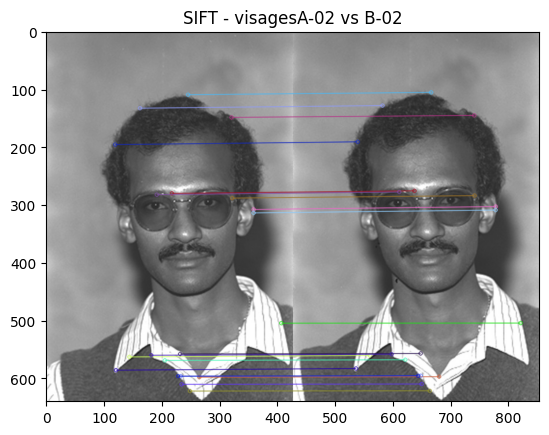

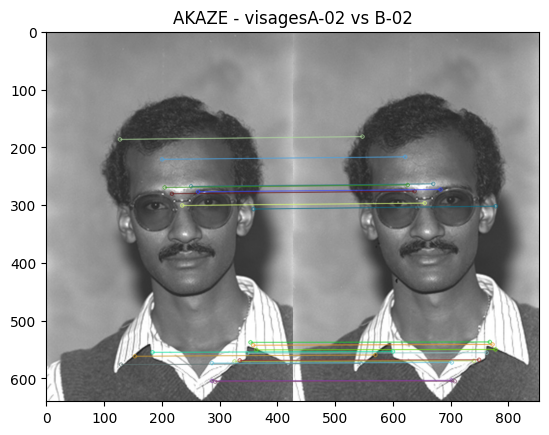

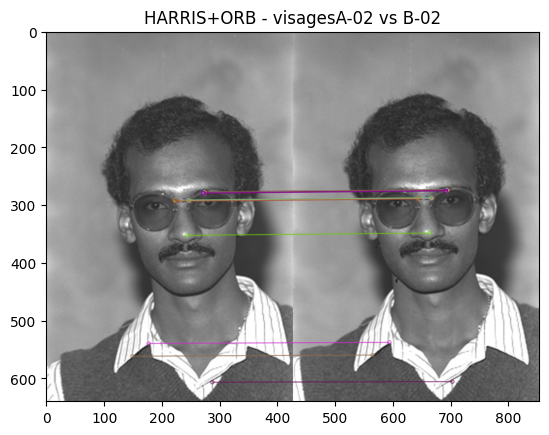

SYS809_projet2025_sequences2/visagesA-02.jpg SYS809_projet2025_sequences2/visagesB-03.jpg
SYS809_projet2025_sequences2/visagesA-02.jpg SYS809_projet2025_sequences2/visagesB-04.jpg
SYS809_projet2025_sequences2/visagesA-02.jpg SYS809_projet2025_sequences2/visagesB-05.jpg
SYS809_projet2025_sequences2/visagesA-02.jpg SYS809_projet2025_sequences2/visagesB-06.jpg
SYS809_projet2025_sequences2/visagesA-02.jpg SYS809_projet2025_sequences2/visagesB-07.jpg
SYS809_projet2025_sequences2/visagesA-02.jpg SYS809_projet2025_sequences2/visagesB-08.jpg
SYS809_projet2025_sequences2/visagesA-02.jpg SYS809_projet2025_sequences2/visagesB-09.jpg
SYS809_projet2025_sequences2/visagesA-03.jpg SYS809_projet2025_sequences2/visagesB-00.jpg
SYS809_projet2025_sequences2/visagesA-03.jpg SYS809_projet2025_sequences2/visagesB-01.jpg
SYS809_projet2025_sequences2/visagesA-03.jpg SYS809_projet2025_sequences2/visagesB-02.jpg
SYS809_projet2025_sequences2/visagesA-03.jpg SYS809_projet2025_sequences2/visagesB-03.jpg
SYS809_pro

In [ ]:


scene_aleatoire = random.choice(["brain", "cuisine", "parc", "studio", "visages"])
indice_aleatoire = random.randint(0, 9)

for scene in ["brain", "cuisine", "parc", "studio", "visages"]:
    if scene == "brain":
        ext = ".png"
        max_i = 11
        max_j = 11
    else:
        ext = ".jpg"
        max_i = 10
        max_j = 10

    for i in range(0, max_i):  # A{i}
        image_A = f"SYS809_projet2025_sequences2/{scene}A-{str(i).zfill(2)}{ext}"
        imgA = cv2.imread(image_A)
        if imgA is None:
            continue
        gris_A = cv2.cvtColor(imgA, cv2.COLOR_BGR2GRAY)

        for j in range(0, max_j):  # B{j}
            image_B = f"SYS809_projet2025_sequences2/{scene}B-{str(j).zfill(2)}{ext}"
            print(image_A, image_B)

            imgB = cv2.imread(image_B)
            if imgB is None:
                continue
            gris_B = cv2.cvtColor(imgB, cv2.COLOR_BGR2GRAY)

            sift = cv2.SIFT_create()
            kpA_sift, desA_sift = sift.detectAndCompute(gris_A, None)
            kpB_sift, desB_sift = sift.detectAndCompute(gris_B, None)
            if desA_sift is not None and desB_sift is not None:
                matcher_sift = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
                matches_sift = matcher_sift.match(desA_sift, desB_sift)
                matches_sift = sorted(matches_sift, key=lambda x: x.distance)
                sift_matches_img = cv2.drawMatches(
                    imgA, kpA_sift, imgB, kpB_sift, matches_sift[:20], None,
                    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
            else:
                sift_matches_img = np.zeros_like(imgA)

            
            akaze = cv2.AKAZE_create()
            kpA_akaze, desA_akaze = akaze.detectAndCompute(gris_A, None)
            kpB_akaze, desB_akaze = akaze.detectAndCompute(gris_B, None)
            if desA_akaze is not None and desB_akaze is not None:
                matcher_akaze = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
                matches_akaze = matcher_akaze.match(desA_akaze, desB_akaze)
                matches_akaze = sorted(matches_akaze, key=lambda x: x.distance)
                akaze_matches_img = cv2.drawMatches(
                    imgA, kpA_akaze, imgB, kpB_akaze, matches_akaze[:20], None,
                    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
            else:
                akaze_matches_img = np.zeros_like(imgA)

         
            coins_A = cv2.cornerHarris(gris_A, 2, 3, 0.04)
            coins_B = cv2.cornerHarris(gris_B, 2, 3, 0.04)

            seuil_A = 0.01 * coins_A.max()
            seuil_B = 0.01 * coins_B.max()

            coords_A = np.argwhere(coins_A > seuil_A)
            coords_B = np.argwhere(coins_B > seuil_B)

            keypoints_A = [cv2.KeyPoint(float(x), float(y), 3) for y, x in coords_A]
            keypoints_B = [cv2.KeyPoint(float(x), float(y), 3) for y, x in coords_B]

            orb = cv2.ORB_create()
            keypoints_A, desA_orb = orb.compute(gris_A, keypoints_A)
            keypoints_B, desB_orb = orb.compute(gris_B, keypoints_B)

            if desA_orb is not None and desB_orb is not None:
                matcher_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
                matches_orb = matcher_orb.match(desA_orb, desB_orb)
                matches_orb = sorted(matches_orb, key=lambda x: x.distance)
                orb_matches_img = cv2.drawMatches(
                    imgA, keypoints_A, imgB, keypoints_B, matches_orb[:20], None,
                    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
            else:
                orb_matches_img = np.zeros_like(imgA)

            
            if scene == scene_aleatoire and i == indice_aleatoire and j == indice_aleatoire:
                plt.figure()
                plt.title(f"SIFT - {scene}A-{str(i).zfill(2)} vs B-{str(j).zfill(2)}")
                plt.imshow(sift_matches_img)

                plt.figure()
                plt.title(f"AKAZE - {scene}A-{str(i).zfill(2)} vs B-{str(j).zfill(2)}")
                plt.imshow(akaze_matches_img)

                plt.figure()
                plt.title(f"HARRIS+ORB - {scene}A-{str(i).zfill(2)} vs B-{str(j).zfill(2)}")
                plt.imshow(orb_matches_img)

                plt.show()


Scène : brain - A0 vs B0 ➡️ Erreur = 0
Scène : brain - A1 vs B6 ➡️ Erreur = 5
Scène : brain - A2 vs B2 ➡️ Erreur = 0
Scène : brain - A3 vs B6 ➡️ Erreur = 3
Scène : brain - A4 vs B5 ➡️ Erreur = 1
Scène : brain - A5 vs B5 ➡️ Erreur = 0
Scène : brain - A6 vs B6 ➡️ Erreur = 0
Scène : brain - A7 vs B6 ➡️ Erreur = 1
Scène : brain - A8 vs B6 ➡️ Erreur = 2
Scène : brain - A9 vs B0 ➡️ Erreur = 9
Scène : brain - A10 vs B10 ➡️ Erreur = 0
brain - Temps total : 26.32s - Temps moyen par comparaison : 0.2176s


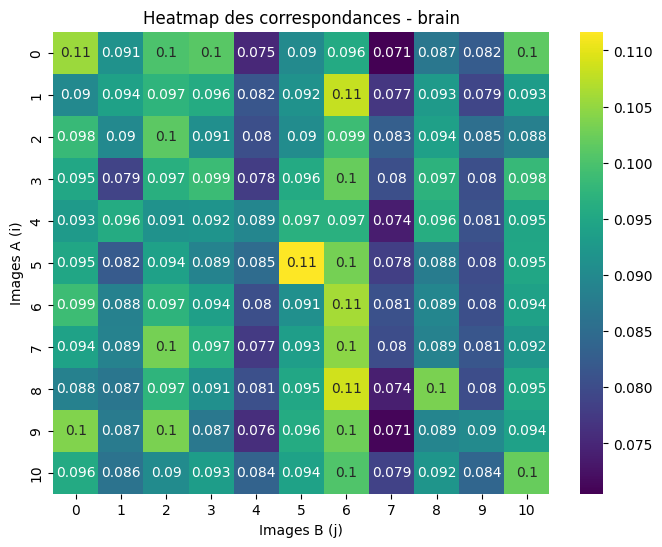

Scène : parc - A0 vs B0 ➡️ Erreur = 0
Scène : parc - A1 vs B1 ➡️ Erreur = 0
Scène : parc - A2 vs B2 ➡️ Erreur = 0
Scène : parc - A3 vs B3 ➡️ Erreur = 0
Scène : parc - A4 vs B4 ➡️ Erreur = 0
Scène : parc - A5 vs B6 ➡️ Erreur = 1
Scène : parc - A6 vs B6 ➡️ Erreur = 0
Scène : parc - A7 vs B8 ➡️ Erreur = 1
Scène : parc - A8 vs B6 ➡️ Erreur = 2
Scène : parc - A9 vs B3 ➡️ Erreur = 6
parc - Temps total : 24.84s - Temps moyen par comparaison : 0.2484s


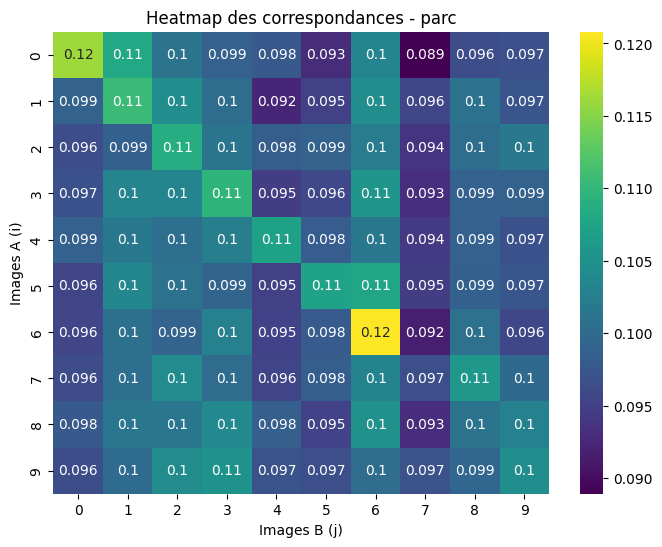

Scène : studio - A0 vs B0 ➡️ Erreur = 0
Scène : studio - A1 vs B1 ➡️ Erreur = 0
Scène : studio - A2 vs B2 ➡️ Erreur = 0
Scène : studio - A3 vs B3 ➡️ Erreur = 0
Scène : studio - A4 vs B4 ➡️ Erreur = 0
Scène : studio - A5 vs B5 ➡️ Erreur = 0
Scène : studio - A6 vs B6 ➡️ Erreur = 0
Scène : studio - A7 vs B7 ➡️ Erreur = 0
Scène : studio - A8 vs B8 ➡️ Erreur = 0
Scène : studio - A9 vs B9 ➡️ Erreur = 0
studio - Temps total : 11.81s - Temps moyen par comparaison : 0.1181s


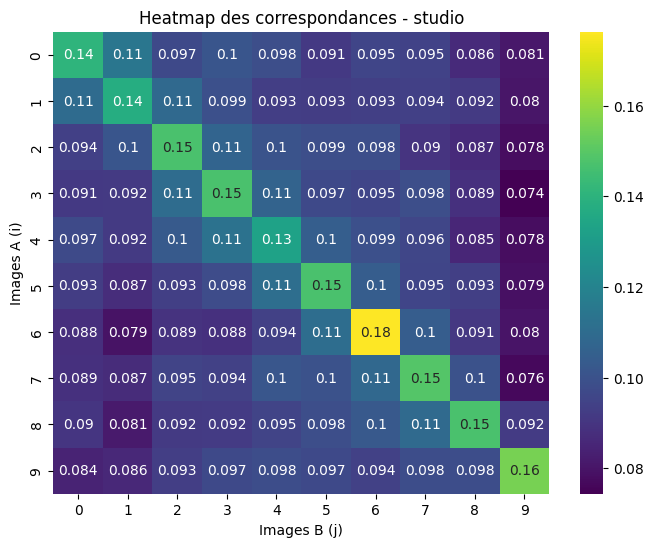

Scène : visages - A0 vs B0 ➡️ Erreur = 0
Scène : visages - A1 vs B1 ➡️ Erreur = 0
Scène : visages - A2 vs B2 ➡️ Erreur = 0
Scène : visages - A3 vs B3 ➡️ Erreur = 0
Scène : visages - A4 vs B4 ➡️ Erreur = 0
Scène : visages - A5 vs B5 ➡️ Erreur = 0
Scène : visages - A6 vs B6 ➡️ Erreur = 0
Scène : visages - A7 vs B7 ➡️ Erreur = 0
Scène : visages - A8 vs B8 ➡️ Erreur = 0
Scène : visages - A9 vs B9 ➡️ Erreur = 0
visages - Temps total : 7.74s - Temps moyen par comparaison : 0.0774s


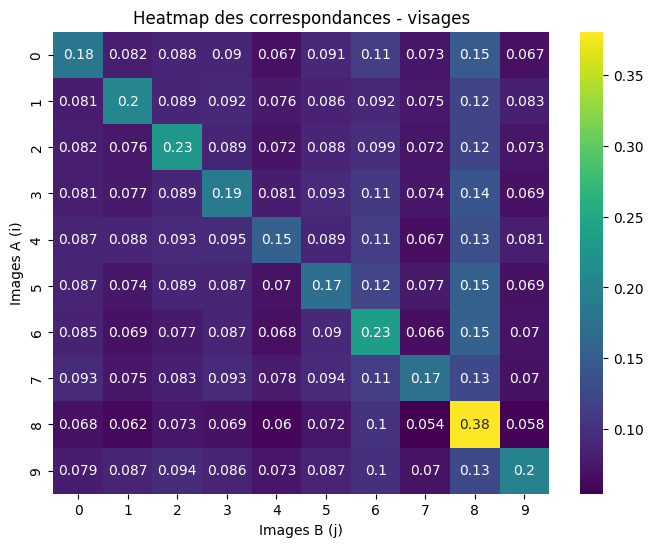

⚠️ Pas de descripteurs pour A0 ou B7
Scène : cuisine - A0 vs B3 ➡️ Erreur = 3
⚠️ Pas de descripteurs pour A1 ou B7
Scène : cuisine - A1 vs B3 ➡️ Erreur = 2
⚠️ Pas de descripteurs pour A2 ou B7
Scène : cuisine - A2 vs B2 ➡️ Erreur = 0
⚠️ Pas de descripteurs pour A3 ou B7
Scène : cuisine - A3 vs B3 ➡️ Erreur = 0
⚠️ Pas de descripteurs pour A4 ou B7
Scène : cuisine - A4 vs B4 ➡️ Erreur = 0
⚠️ Pas de descripteurs pour A5 ou B7
Scène : cuisine - A5 vs B5 ➡️ Erreur = 0
⚠️ Pas de descripteurs pour A6 ou B0
⚠️ Pas de descripteurs pour A6 ou B1
⚠️ Pas de descripteurs pour A6 ou B2
⚠️ Pas de descripteurs pour A6 ou B3
⚠️ Pas de descripteurs pour A6 ou B4
⚠️ Pas de descripteurs pour A6 ou B5
⚠️ Pas de descripteurs pour A6 ou B6
⚠️ Pas de descripteurs pour A6 ou B7
⚠️ Pas de descripteurs pour A6 ou B8
⚠️ Pas de descripteurs pour A6 ou B9
⚠️ Pas de descripteurs pour A7 ou B7
Scène : cuisine - A7 vs B1 ➡️ Erreur = 6
⚠️ Pas de descripteurs pour A8 ou B7
Scène : cuisine - A8 vs B3 ➡️ Erreur = 5
⚠️ Pas

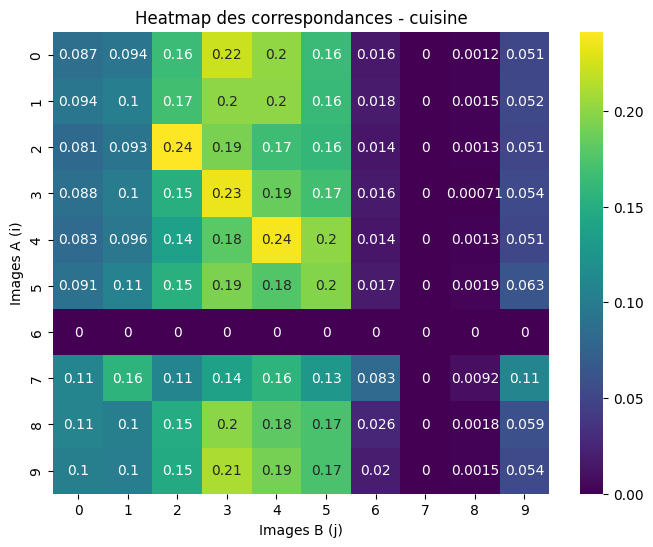

In [ ]:
sift = cv2.SIFT_create()
matrices_sift = {}

for scene in ["brain", "parc", "studio", "visages", "cuisine"]:
    if scene == "brain":
        ext = ".png"
        max_i = 11
        max_j = 11
    else:
        ext = ".jpg"
        max_i = 10
        max_j = 10

    matrice_scores = np.zeros((max_i, max_j))

    start_time = time.time()

    for i in range(0, max_i):  # A{i}
        image_A = f"SYS809_projet2025_sequences2/{scene}A-{str(i).zfill(2)}{ext}"
        imgA = cv2.imread(image_A)
        if imgA is None:
            print(f" Image non trouvée : {image_A}")
            continue

        gris_A = cv2.cvtColor(imgA, cv2.COLOR_BGR2GRAY)
        kpA, desA = sift.detectAndCompute(gris_A, None)
        kptsA = np.array([kp.pt for kp in kpA])
        np.save(image_A + ".sift.kpts.npy", kptsA)

        scores = []

        for j in range(0, max_j):  # B{j}
            image_B = f"SYS809_projet2025_sequences2/{scene}B-{str(j).zfill(2)}{ext}"
            imgB = cv2.imread(image_B)
            if imgB is None:
                print(f" Image non trouvée : {image_B}")
                continue

            gris_B = cv2.cvtColor(imgB, cv2.COLOR_BGR2GRAY)
            kpB, desB = sift.detectAndCompute(gris_B, None)
            kptsB = np.array([kp.pt for kp in kpB])
            np.save(image_B + ".sift.kpts.npy", kptsB)

          
            if desA is None or desB is None:
                print(f"Pas de descripteurs pour A{i} ou B{j}")
                continue

          
            if desA.dtype != desB.dtype:
                desB = desB.astype(desA.dtype)

            matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
            matches = matcher.match(desA, desB)

            scores.append(len(matches))  
            matrice_scores[i, j] = len(matches) 
        
        if len(scores) > 0:
            j_max = np.argmax(scores)
            erreur = abs(i - j_max)    
            print(f"Scène : {scene} - A{i} vs B{j_max} ➡️ Erreur = {erreur}")

            
            if np.sum(matrice_scores[i, :]) > 0:
                matrice_scores[i, :] = matrice_scores[i, :] / np.sum(matrice_scores[i, :])

    end_time = time.time()
    duree_totale = end_time - start_time
    temps_moyen = duree_totale / (max_i * max_j)
    print(f"{scene} - Temps total : {duree_totale:.2f}s - Temps moyen par comparaison : {temps_moyen:.4f}s")
    
    matrices_sift[scene] = matrice_scores
         
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrice_scores, annot=True, cmap="viridis")
    plt.xlabel("Images B (j)")
    plt.ylabel("Images A (i)")
    plt.title(f"Heatmap des correspondances - {scene}")
    plt.show()


In [13]:
for scene in ["brain", "parc", "studio", "visages", "cuisine" ]:
    matrice = matrices_sift[scene]  

    erreurs = []
    for i in range(matrice.shape[0]):
        j_max = np.argmax(matrice[i, :])
        erreur = abs(i - j_max)
        erreurs.append(erreur)
    
    print(f"{scene} - Erreur moyenne SIFT : {np.mean(erreurs):.2f}")


brain - Erreur moyenne SIFT : 1.91
parc - Erreur moyenne SIFT : 1.00
studio - Erreur moyenne SIFT : 0.00
visages - Erreur moyenne SIFT : 0.00
cuisine - Erreur moyenne SIFT : 2.80


In [6]:
def charger_image(path):
    img = cv2.imread(path)
    if img is None:
        print(f" Image introuvable : {path}")
        return None
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def score_similarite_sift(img_cible, img1, img2):
    sift = cv2.SIFT_create()
    kp_cible, des_cible = sift.detectAndCompute(img_cible, None)
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    score = 0

    if des_cible is not None and des1 is not None:
        matches1 = bf.match(des_cible, des1)
        score += sum([m.distance for m in matches1]) / len(matches1) if matches1 else 1e6
    else:
        score += 1e6

    if des_cible is not None and des2 is not None:
        matches2 = bf.match(des_cible, des2)
        score += sum([m.distance for m in matches2]) / len(matches2) if matches2 else 1e6
    else:
        score += 1e6

    return score


dossier = "SYS809_projet2025_sequences2"
scene = "parc"  
max_index = 10

if scene == "brain":
    ext = ".png"
    max_index = 11
else:
    ext = ".jpg"
    max_index = 10


i_cible = random.randint(1, max_index - 2)
img_cible_path = f"{dossier}/{scene}A-{str(i_cible).zfill(2)}{ext}"
img_cible = charger_image(img_cible_path)

print(f" Image cible : {scene}A-{str(i_cible).zfill(2)}{ext}")


images_A = []
indices_A = []

images_B = []
indices_B = []

for i in range(max_index):
    if i != i_cible:
        path_A = f"{dossier}/{scene}A-{str(i).zfill(2)}{ext}"
        path_B = f"{dossier}/{scene}B-{str(i).zfill(2)}{ext}"

        img_A = charger_image(path_A)
        img_B = charger_image(path_B)

        if img_A is not None:
            images_A.append(img_A)
            indices_A.append(i)

        if img_B is not None:
            images_B.append(img_B)
            indices_B.append(i)


scores_A = []
paires_A = []

for j in range(len(images_A) - 1):
    i1 = indices_A[j]
    i2 = indices_A[j + 1]

    score = score_similarite_sift(img_cible, images_A[j], images_A[j + 1])
    scores_A.append(score)
    paires_A.append((i1, i2))


scores_B = []
paires_B = []

for j in range(len(images_B) - 1):
    i1 = indices_B[j]
    i2 = indices_B[j + 1]

    score = score_similarite_sift(img_cible, images_B[j], images_B[j + 1])
    scores_B.append(score)
    paires_B.append((i1, i2))


if scores_A:
    idx_A = np.argmin(scores_A)
    j1_A, j2_A = paires_A[idx_A]
    estimation_A = j2_A

    if j1_A < i_cible < j2_A:
        erreur_A = 0
    else:
        erreur_A = min(abs(i_cible - j1_A), abs(i_cible - j2_A))
else:
    estimation_A = None
    erreur_A = None

if scores_B:
    idx_B = np.argmin(scores_B)
    j1_B, j2_B = paires_B[idx_B]
    estimation_B = j2_B

    if j1_B < i_cible < j2_B:
        erreur_B = 0
    else:
        erreur_B = min(abs(i_cible - j1_B), abs(i_cible - j2_B))
else:
    estimation_B = None
    erreur_B = None



print("\n Résultat de l'insertion logique :")
print(f" Position réelle de l’image cible : A-{str(i_cible).zfill(2)}")

if estimation_A is not None:
    print(f" Insertion estimée dans A : entre A-{str(j1_A).zfill(2)} et A-{str(j2_A).zfill(2)}")
    print(f"   Erreur (A) = {erreur_A}")
else:
    print("Insertion dans A : impossible à estimer")

if estimation_B is not None:
    print(f" Insertion estimée dans B : entre B-{str(j1_B).zfill(2)} et B-{str(j2_B).zfill(2)}")
    print(f"   Erreur (B) = {erreur_B}")
else:
    print(" Insertion dans B : impossible à estimer")


 Image cible : parcA-04.jpg

 Résultat de l'insertion logique :
 Position réelle de l’image cible : A-04
 Insertion estimée dans A : entre A-03 et A-05
   Erreur (A) = 0
 Insertion estimée dans B : entre B-03 et B-05
   Erreur (B) = 0


Scène : brain - A0 vs B10 ➡️ Erreur = 10
Scène : brain - A1 vs B2 ➡️ Erreur = 1
Scène : brain - A2 vs B2 ➡️ Erreur = 0
Scène : brain - A3 vs B2 ➡️ Erreur = 1
Scène : brain - A4 vs B2 ➡️ Erreur = 2
Scène : brain - A5 vs B5 ➡️ Erreur = 0
Scène : brain - A6 vs B6 ➡️ Erreur = 0
Scène : brain - A7 vs B2 ➡️ Erreur = 5
Scène : brain - A8 vs B2 ➡️ Erreur = 6
Scène : brain - A9 vs B2 ➡️ Erreur = 7
Scène : brain - A10 vs B2 ➡️ Erreur = 8
brain - Temps total : 11.75s - Temps moyen par comparaison : 0.0971s


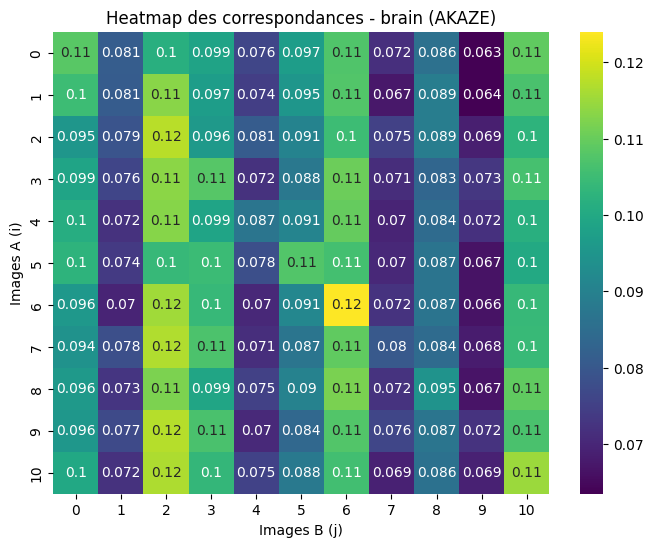

Scène : parc - A0 vs B1 ➡️ Erreur = 1
Scène : parc - A1 vs B1 ➡️ Erreur = 0
Scène : parc - A2 vs B8 ➡️ Erreur = 6
Scène : parc - A3 vs B3 ➡️ Erreur = 0
Scène : parc - A4 vs B8 ➡️ Erreur = 4
Scène : parc - A5 vs B5 ➡️ Erreur = 0
Scène : parc - A6 vs B6 ➡️ Erreur = 0
Scène : parc - A7 vs B8 ➡️ Erreur = 1
Scène : parc - A8 vs B8 ➡️ Erreur = 0
Scène : parc - A9 vs B8 ➡️ Erreur = 1
parc - Temps total : 4.47s - Temps moyen par comparaison : 0.0447s


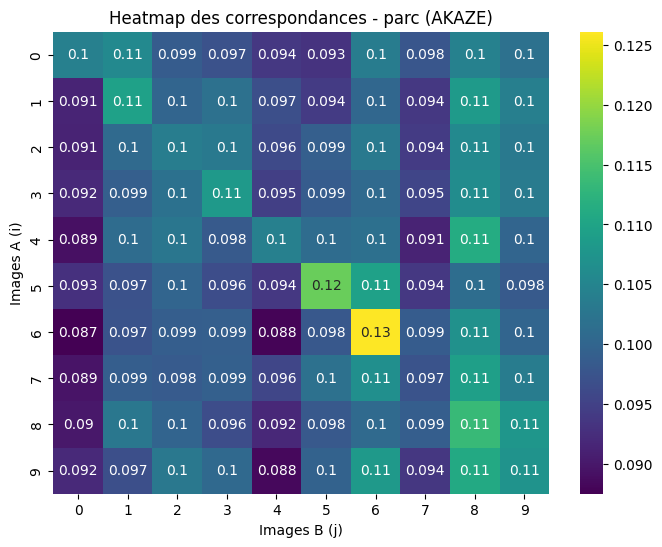

Scène : studio - A0 vs B0 ➡️ Erreur = 0
Scène : studio - A1 vs B1 ➡️ Erreur = 0
Scène : studio - A2 vs B2 ➡️ Erreur = 0
Scène : studio - A3 vs B3 ➡️ Erreur = 0
Scène : studio - A4 vs B4 ➡️ Erreur = 0
Scène : studio - A5 vs B5 ➡️ Erreur = 0
Scène : studio - A6 vs B6 ➡️ Erreur = 0
Scène : studio - A7 vs B7 ➡️ Erreur = 0
Scène : studio - A8 vs B8 ➡️ Erreur = 0
Scène : studio - A9 vs B9 ➡️ Erreur = 0
studio - Temps total : 3.60s - Temps moyen par comparaison : 0.0360s


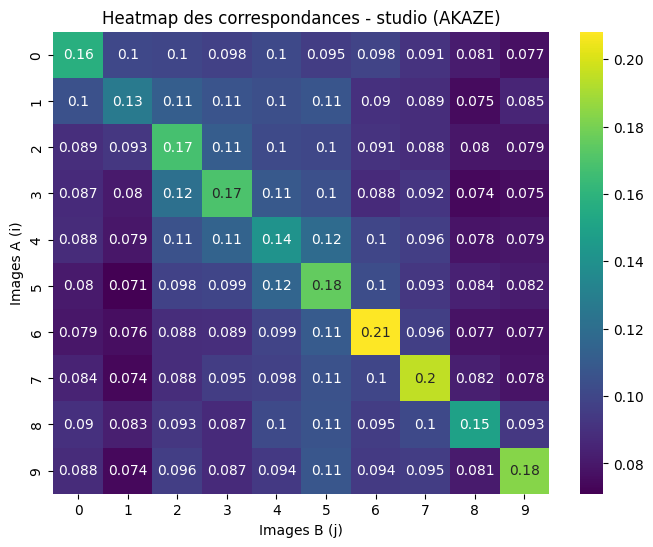

Scène : visages - A0 vs B0 ➡️ Erreur = 0
Scène : visages - A1 vs B1 ➡️ Erreur = 0
Scène : visages - A2 vs B2 ➡️ Erreur = 0
Scène : visages - A3 vs B3 ➡️ Erreur = 0
Scène : visages - A4 vs B4 ➡️ Erreur = 0
Scène : visages - A5 vs B5 ➡️ Erreur = 0
Scène : visages - A6 vs B6 ➡️ Erreur = 0
Scène : visages - A7 vs B7 ➡️ Erreur = 0
Scène : visages - A8 vs B8 ➡️ Erreur = 0
Scène : visages - A9 vs B9 ➡️ Erreur = 0
visages - Temps total : 2.57s - Temps moyen par comparaison : 0.0257s


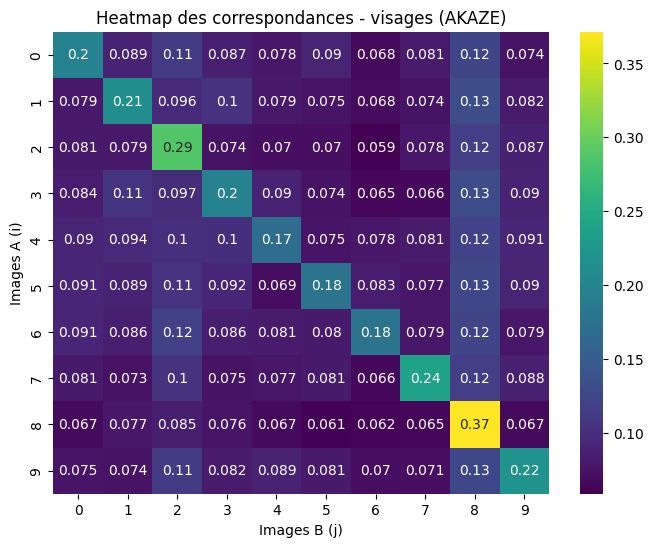

⚠️ Pas de descripteurs pour A0 ou B7
⚠️ Pas de descripteurs pour A0 ou B8
Scène : cuisine - A0 vs B4 ➡️ Erreur = 4
⚠️ Pas de descripteurs pour A1 ou B7
⚠️ Pas de descripteurs pour A1 ou B8
Scène : cuisine - A1 vs B3 ➡️ Erreur = 2
⚠️ Pas de descripteurs pour A2 ou B7
⚠️ Pas de descripteurs pour A2 ou B8
Scène : cuisine - A2 vs B2 ➡️ Erreur = 0
⚠️ Pas de descripteurs pour A3 ou B7
⚠️ Pas de descripteurs pour A3 ou B8
Scène : cuisine - A3 vs B3 ➡️ Erreur = 0
⚠️ Pas de descripteurs pour A4 ou B7
⚠️ Pas de descripteurs pour A4 ou B8
Scène : cuisine - A4 vs B4 ➡️ Erreur = 0
⚠️ Pas de descripteurs pour A5 ou B7
⚠️ Pas de descripteurs pour A5 ou B8
Scène : cuisine - A5 vs B3 ➡️ Erreur = 2
⚠️ Pas de descripteurs pour A6 ou B0
⚠️ Pas de descripteurs pour A6 ou B1
⚠️ Pas de descripteurs pour A6 ou B2
⚠️ Pas de descripteurs pour A6 ou B3
⚠️ Pas de descripteurs pour A6 ou B4
⚠️ Pas de descripteurs pour A6 ou B5
⚠️ Pas de descripteurs pour A6 ou B6
⚠️ Pas de descripteurs pour A6 ou B7
⚠️ Pas de desc

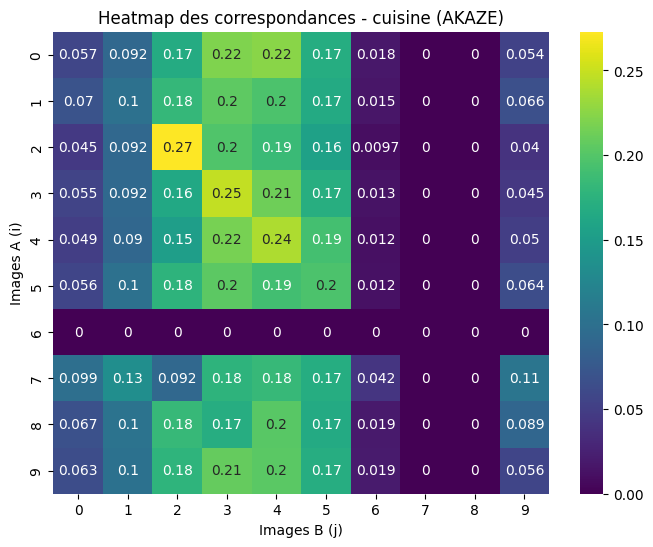

In [ ]:
akaze = cv2.AKAZE_create()
matrices_akaze = {}

for scene in ["brain", "parc", "studio", "visages", "cuisine"]:
    if scene == "brain":
        ext = ".png"
        max_i = 11
        max_j = 11
    else:
        ext = ".jpg"
        max_i = 10
        max_j = 10

    matrice_scores = np.zeros((max_i, max_j))
    start_time = time.time()

    for i in range(0, max_i):  # A{i}
        image_A = f"SYS809_projet2025_sequences2/{scene}A-{str(i).zfill(2)}{ext}"
        imgA = cv2.imread(image_A)
        if imgA is None:
            print(f" Image A non trouvée : {image_A}")
            continue

        gris_A = cv2.cvtColor(imgA, cv2.COLOR_BGR2GRAY)
        kpA, desA = akaze.detectAndCompute(gris_A, None)

        scores = []

        for j in range(0, max_j):  # B{j}
            image_B = f"SYS809_projet2025_sequences2/{scene}B-{str(j).zfill(2)}{ext}"
            imgB = cv2.imread(image_B)
            if imgB is None:
                print(f" Image B non trouvée : {image_B}")
                continue

            gris_B = cv2.cvtColor(imgB, cv2.COLOR_BGR2GRAY)
            kpB, desB = akaze.detectAndCompute(gris_B, None)

           
            if desA is None or desB is None:
                print(f" Pas de descripteurs pour A{i} ou B{j}")
                continue

            if desA.dtype != desB.dtype:
                desB = desB.astype(desA.dtype)

            matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
            matches = matcher.match(desA, desB)

            scores.append(len(matches)) 
            matrice_scores[i, j] = len(matches)

        if len(scores) > 0:
            j_max = np.argmax(scores)
            erreur = abs(i - j_max)
            print(f"Scène : {scene} - A{i} vs B{j_max} ➡️ Erreur = {erreur}")

           
            if np.sum(matrice_scores[i, :]) > 0:
                matrice_scores[i, :] = matrice_scores[i, :] / np.sum(matrice_scores[i, :])

    end_time = time.time()
    duree_totale = end_time - start_time
    temps_moyen = duree_totale / (max_i * max_j)
    print(f"{scene} - Temps total : {duree_totale:.2f}s - Temps moyen par comparaison : {temps_moyen:.4f}s")
    
    matrices_akaze[scene] = matrice_scores

    plt.figure(figsize=(8, 6))
    sns.heatmap(matrice_scores, annot=True, cmap="viridis")
    plt.xlabel("Images B (j)")
    plt.ylabel("Images A (i)")
    plt.title(f"Heatmap des correspondances - {scene} (AKAZE)")
    plt.show()


In [211]:
for scene in ["brain", "parc", "studio", "visages", "cuisine" ]:
    matrice = matrices_akaze[scene]  

    erreurs = []
    for i in range(matrice.shape[0]):
        j_max = np.argmax(matrice[i, :])
        erreur = abs(i - j_max)
        erreurs.append(erreur)
    
    print(f"{scene} - Erreur moyenne Akaze : {np.mean(erreurs):.2f}")

brain - Erreur moyenne Akaze : 3.64
parc - Erreur moyenne Akaze : 1.30
studio - Erreur moyenne Akaze : 0.00
visages - Erreur moyenne Akaze : 0.00
cuisine - Erreur moyenne Akaze : 2.70


In [7]:
def charger_image(path):
    img = cv2.imread(path)
    if img is None:
        print(f" Image introuvable : {path}")
        return None
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def score_similarite_akaze(img_cible, img1, img2):
    akaze = cv2.AKAZE_create()
    kp_cible, des_cible = akaze.detectAndCompute(img_cible, None)
    kp1, des1 = akaze.detectAndCompute(img1, None)
    kp2, des2 = akaze.detectAndCompute(img2, None)

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    score = 0

    if des_cible is not None and des1 is not None:
        matches1 = bf.match(des_cible, des1)
        score += sum([m.distance for m in matches1]) / len(matches1) if matches1 else 1e6
    else:
        score += 1e6

    if des_cible is not None and des2 is not None:
        matches2 = bf.match(des_cible, des2)
        score += sum([m.distance for m in matches2]) / len(matches2) if matches2 else 1e6
    else:
        score += 1e6

    return score



dossier = "SYS809_projet2025_sequences2"
scene = "brain" 
max_index = 10


if scene == "brain":
    ext = ".png"
    max_index = 11
else:
    ext = ".jpg"
    max_index = 10



i_cible = random.randint(1, max_index - 2)
img_cible_path = f"{dossier}/{scene}A-{str(i_cible).zfill(2)}{ext}"
img_cible = charger_image(img_cible_path)

print(f" Image cible : {scene}A-{str(i_cible).zfill(2)}{ext}")


images_A = []
indices_A = []

images_B = []
indices_B = []

for i in range(max_index):
    if i != i_cible:
        path_A = f"{dossier}/{scene}A-{str(i).zfill(2)}{ext}"
        path_B = f"{dossier}/{scene}B-{str(i).zfill(2)}{ext}"

        img_A = charger_image(path_A)
        img_B = charger_image(path_B)

        if img_A is not None:
            images_A.append(img_A)
            indices_A.append(i)

        if img_B is not None:
            images_B.append(img_B)
            indices_B.append(i)



scores_A = []
paires_A = []

for j in range(len(images_A) - 1):
    i1 = indices_A[j]
    i2 = indices_A[j + 1]

    score = score_similarite_akaze(img_cible, images_A[j], images_A[j + 1])
    paires_A.append((i1, i2))
    scores_A.append(score)



scores_B = []
paires_B = []

for j in range(len(images_B) - 1):
    i1 = indices_B[j]
    i2 = indices_B[j + 1]

    score = score_similarite_akaze(img_cible, images_B[j], images_B[j + 1])
    paires_B.append((i1, i2))
    scores_B.append(score)



if scores_A:
    idx_A = np.argmin(scores_A)
    j1_A, j2_A = paires_A[idx_A]
    estimation_A = j2_A

    if j1_A < i_cible < j2_A:
        erreur_A = 0
    else:
        erreur_A = min(abs(i_cible - j1_A), abs(i_cible - j2_A))
else:
    estimation_A = None
    erreur_A = None

if scores_B:
    idx_B = np.argmin(scores_B)
    j1_B, j2_B = paires_B[idx_B]
    estimation_B = j2_B

    if j1_B < i_cible < j2_B:
        erreur_B = 0
    else:
        erreur_B = min(abs(i_cible - j1_B), abs(i_cible - j2_B))
else:
    estimation_B = None
    erreur_B = None


print("\n Résultat de l'insertion logique (AKAZE) :")
print(f"  Position réelle de l’image cible : A-{str(i_cible).zfill(2)}")

if estimation_A is not None:
    print(f"Insertion estimée dans A : entre A-{str(j1_A).zfill(2)} et A-{str(j2_A).zfill(2)}")
    print(f"   Erreur (A) = {erreur_A}")
else:
    print(" Insertion dans A : impossible à estimer")

if estimation_B is not None:
    print(f" Insertion estimée dans B : entre B-{str(j1_B).zfill(2)} et B-{str(j2_B).zfill(2)}")
    print(f"    Erreur (B) = {erreur_B}")
else:
    print(" Insertion dans B : impossible à estimer")


 Image cible : brainA-03.png

 Résultat de l'insertion logique (AKAZE) :
  Position réelle de l’image cible : A-03
Insertion estimée dans A : entre A-05 et A-06
   Erreur (A) = 2
 Insertion estimée dans B : entre B-05 et B-06
    Erreur (B) = 2


Scène : brain - A0 vs B0 ➡️ Erreur = 0
Scène : brain - A1 vs B2 ➡️ Erreur = 1
Scène : brain - A2 vs B2 ➡️ Erreur = 0
Scène : brain - A3 vs B9 ➡️ Erreur = 6
Scène : brain - A4 vs B4 ➡️ Erreur = 0
Scène : brain - A5 vs B3 ➡️ Erreur = 2
Scène : brain - A6 vs B1 ➡️ Erreur = 5
Scène : brain - A7 vs B4 ➡️ Erreur = 3
Scène : brain - A8 vs B8 ➡️ Erreur = 0
Scène : brain - A9 vs B9 ➡️ Erreur = 0
Scène : brain - A10 vs B0 ➡️ Erreur = 10
brain - Temps total : 2.97s - Temps moyen par comparaison : 0.0245s


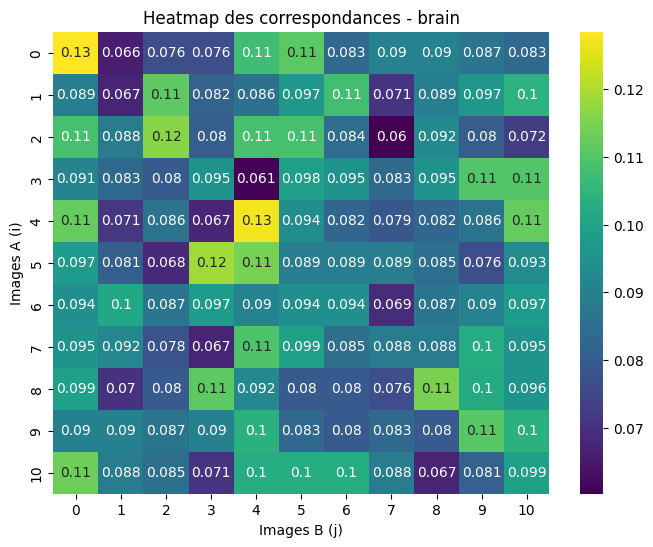

Scène : parc - A0 vs B0 ➡️ Erreur = 0
Scène : parc - A1 vs B0 ➡️ Erreur = 1
Scène : parc - A2 vs B0 ➡️ Erreur = 2
Scène : parc - A3 vs B3 ➡️ Erreur = 0
Scène : parc - A4 vs B1 ➡️ Erreur = 3
Scène : parc - A5 vs B7 ➡️ Erreur = 2
Scène : parc - A6 vs B6 ➡️ Erreur = 0
Scène : parc - A7 vs B2 ➡️ Erreur = 5
Scène : parc - A8 vs B1 ➡️ Erreur = 7
Scène : parc - A9 vs B8 ➡️ Erreur = 1
parc - Temps total : 0.61s - Temps moyen par comparaison : 0.0061s


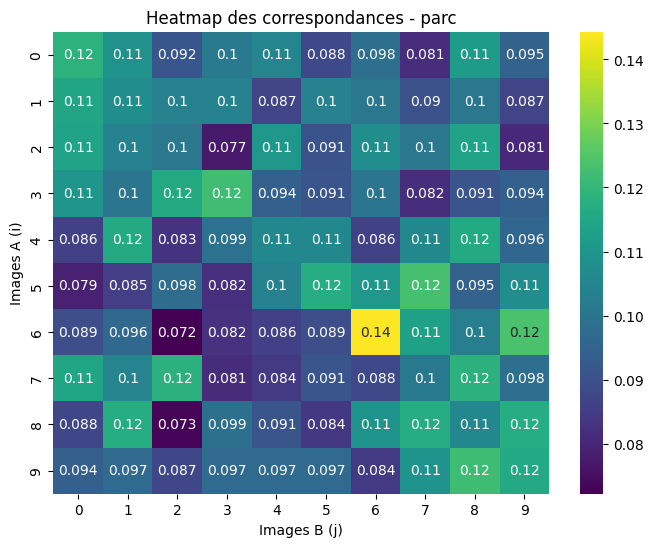

Scène : studio - A0 vs B0 ➡️ Erreur = 0
Scène : studio - A1 vs B1 ➡️ Erreur = 0
Scène : studio - A2 vs B2 ➡️ Erreur = 0
Scène : studio - A3 vs B3 ➡️ Erreur = 0
Scène : studio - A4 vs B4 ➡️ Erreur = 0
Scène : studio - A5 vs B5 ➡️ Erreur = 0
Scène : studio - A6 vs B6 ➡️ Erreur = 0
Scène : studio - A7 vs B7 ➡️ Erreur = 0
Scène : studio - A8 vs B8 ➡️ Erreur = 0
Scène : studio - A9 vs B9 ➡️ Erreur = 0
studio - Temps total : 0.50s - Temps moyen par comparaison : 0.0050s


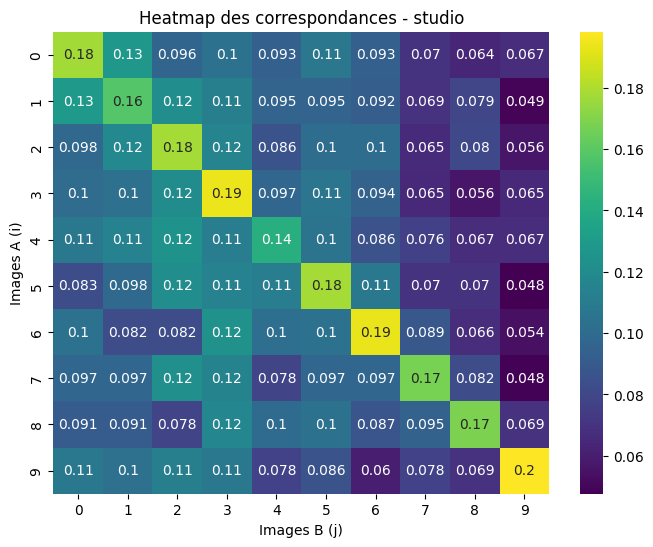

Scène : visages - A0 vs B0 ➡️ Erreur = 0
Scène : visages - A1 vs B1 ➡️ Erreur = 0
Scène : visages - A2 vs B2 ➡️ Erreur = 0
Scène : visages - A3 vs B3 ➡️ Erreur = 0
Scène : visages - A4 vs B4 ➡️ Erreur = 0
Scène : visages - A5 vs B5 ➡️ Erreur = 0
Scène : visages - A6 vs B6 ➡️ Erreur = 0
Scène : visages - A7 vs B7 ➡️ Erreur = 0
Scène : visages - A8 vs B8 ➡️ Erreur = 0
Scène : visages - A9 vs B9 ➡️ Erreur = 0
visages - Temps total : 0.58s - Temps moyen par comparaison : 0.0058s


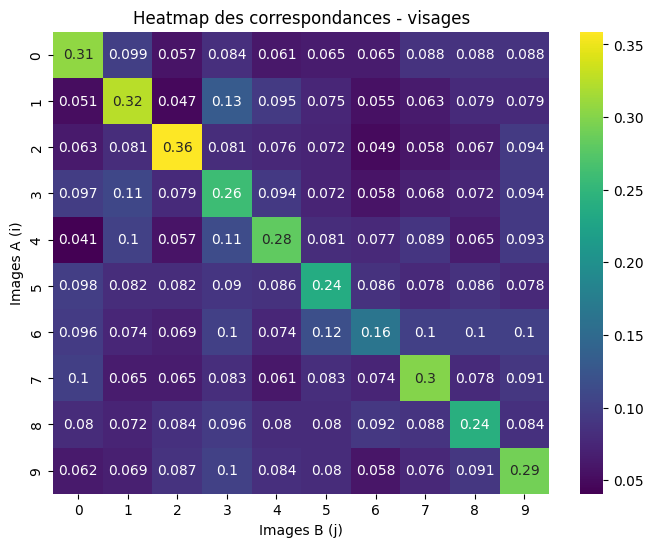

Scène : cuisine - A0 vs B2 ➡️ Erreur = 2
Scène : cuisine - A1 vs B0 ➡️ Erreur = 1
Scène : cuisine - A2 vs B2 ➡️ Erreur = 0
Scène : cuisine - A3 vs B3 ➡️ Erreur = 0
Scène : cuisine - A4 vs B5 ➡️ Erreur = 1
Scène : cuisine - A5 vs B5 ➡️ Erreur = 0
Scène : cuisine - A6 vs B7 ➡️ Erreur = 1
Scène : cuisine - A7 vs B4 ➡️ Erreur = 3
Scène : cuisine - A8 vs B2 ➡️ Erreur = 6
Scène : cuisine - A9 vs B4 ➡️ Erreur = 5
cuisine - Temps total : 1.99s - Temps moyen par comparaison : 0.0199s


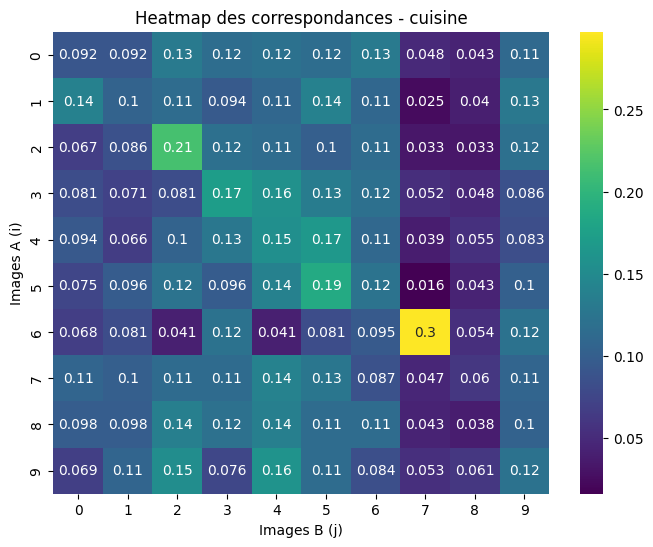

In [ ]:
orb = cv2.ORB_create()
matrices_harris = {}

for scene in ["brain", "parc", "studio", "visages", "cuisine"]:
    if scene == "brain":
        ext = ".png"
        max_i = 11
        max_j = 11
    else:
        ext = ".jpg"
        max_i = 10
        max_j = 10

    matrice_scores = np.zeros((max_i, max_j))
    start_time = time.time()

    for i in range(max_i):
        image_A = f"SYS809_projet2025_sequences2/{scene}A-{str(i).zfill(2)}{ext}"
        imgA = cv2.imread(image_A)
        gris_A = cv2.cvtColor(imgA, cv2.COLOR_BGR2GRAY)

        
        harris_A = cv2.cornerHarris(gris_A, blockSize=2, ksize=3, k=0.04)
        threshold_A = 0.01 * harris_A.max()
        points_A = np.argwhere(harris_A > threshold_A)
        scores_A = harris_A[points_A[:, 0], points_A[:, 1]]
        top_idx_A = np.argsort(scores_A)[-150:]
        points_A = points_A[top_idx_A]
        keypoints_A = [cv2.KeyPoint(float(p[1]), float(p[0]), 1) for p in points_A]
        keypoints_A, desA = orb.compute(gris_A, keypoints_A)

        scores = []

        for j in range(max_j):
            image_B = f"SYS809_projet2025_sequences2/{scene}B-{str(j).zfill(2)}{ext}"
            imgB = cv2.imread(image_B)
            gris_B = cv2.cvtColor(imgB, cv2.COLOR_BGR2GRAY)

           
            harris_B = cv2.cornerHarris(gris_B, blockSize=2, ksize=3, k=0.04)
            threshold_B = 0.01 * harris_B.max()
            points_B = np.argwhere(harris_B > threshold_B)
            scores_B = harris_B[points_B[:, 0], points_B[:, 1]]
            top_idx_B = np.argsort(scores_B)[-150:]
            points_B = points_B[top_idx_B]
            keypoints_B = [cv2.KeyPoint(float(p[1]), float(p[0]), 1) for p in points_B]
            keypoints_B, desB = orb.compute(gris_B, keypoints_B)

           
            if desA is not None and desB is not None:
                matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
                matches = matcher.match(desA, desB)
                nb_matches = len(matches)
            else:
                nb_matches = 0

            scores.append(nb_matches)
            matrice_scores[i, j] = nb_matches

        j_max = np.argmax(scores)
        erreur = abs(i - j_max)

        if np.sum(matrice_scores[i, :]) > 0:
            matrice_scores[i, :] = matrice_scores[i, :] / np.sum(matrice_scores[i, :])

        print(f"Scène : {scene} - A{i} vs B{j_max} ➡️ Erreur = {erreur}")

    end_time = time.time()
    duree_totale = end_time - start_time
    temps_moyen = duree_totale / (max_i * max_j)
    print(f"{scene} - Temps total : {duree_totale:.2f}s - Temps moyen par comparaison : {temps_moyen:.4f}s")

    matrices_harris[scene] = matrice_scores

    plt.figure(figsize=(8, 6))
    sns.heatmap(matrice_scores, annot=True, cmap="viridis")
    plt.xlabel("Images B (j)")
    plt.ylabel("Images A (i)")
    plt.title(f"Heatmap des correspondances - {scene}")
    plt.show()


In [8]:
for scene in ["brain", "parc", "studio", "visages", "cuisine"]:
    matrice = matrices_harris[scene]  

    erreurs = []
    for i in range(matrice.shape[0]):
        j_max = np.argmax(matrice[i, :])
        erreur = abs(i - j_max)
        erreurs.append(erreur)
    
    print(f"{scene} - Erreur moyenne Harris : {np.mean(erreurs):.2f}")

brain - Erreur moyenne Harris : 2.45
parc - Erreur moyenne Harris : 2.10
studio - Erreur moyenne Harris : 0.00
visages - Erreur moyenne Harris : 0.00
cuisine - Erreur moyenne Harris : 1.90


In [8]:
def charger_image(path):
    img = cv2.imread(path)
    if img is None:
        print(f" Image introuvable : {path}")
        return None
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def harris_orb_descriptors(img):
    gray = np.float32(img)
    dst = cv2.cornerHarris(gray, 2, 3, 0.04)
    dst = cv2.dilate(dst, None)
    keypoints = np.argwhere(dst > 0.01 * dst.max())
    keypoints = [cv2.KeyPoint(float(x[1]), float(x[0]), 1) for x in keypoints]

    orb = cv2.ORB_create()
    kps, des = orb.compute(img, keypoints)
    return des

def score_similarite_harris_orb(img_cible, img1, img2):
    des_cible = harris_orb_descriptors(img_cible)
    des1 = harris_orb_descriptors(img1)
    des2 = harris_orb_descriptors(img2)

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    score = 0

    if des_cible is not None and des1 is not None:
        matches1 = bf.match(des_cible, des1)
        score += sum([m.distance for m in matches1]) / len(matches1) if matches1 else 1e6
    else:
        score += 1e6

    if des_cible is not None and des2 is not None:
        matches2 = bf.match(des_cible, des2)
        score += sum([m.distance for m in matches2]) / len(matches2) if matches2 else 1e6
    else:
        score += 1e6

    return score



dossier = "SYS809_projet2025_sequences2"
scene = "brain"  


if scene == "brain":
    ext = ".png"
    max_index = 11
else:
    ext = ".jpg"
    max_index = 10

i_cible = random.randint(1, max_index - 2)
img_cible_path = f"{dossier}/{scene}A-{str(i_cible).zfill(2)}{ext}"
img_cible = charger_image(img_cible_path)

print(f" Image cible : {scene}A-{str(i_cible).zfill(2)}{ext}")



images_A = []
indices_A = []

images_B = []
indices_B = []

for i in range(max_index):
    if i != i_cible:
        path_A = f"{dossier}/{scene}A-{str(i).zfill(2)}{ext}"
        img_A = charger_image(path_A)
        if img_A is not None:
            images_A.append(img_A)
            indices_A.append(i)

        path_B = f"{dossier}/{scene}B-{str(i).zfill(2)}{ext}"
        img_B = charger_image(path_B)
        if img_B is not None:
            images_B.append(img_B)
            indices_B.append(i)



scores_A = []
paires_A = []

for j in range(len(images_A) - 1):
    i1 = indices_A[j]
    i2 = indices_A[j + 1]
    score = score_similarite_harris_orb(img_cible, images_A[j], images_A[j + 1])
    paires_A.append((i1, i2))
    scores_A.append(score)



scores_B = []
paires_B = []

for j in range(len(images_B) - 1):
    i1 = indices_B[j]
    i2 = indices_B[j + 1]
    score = score_similarite_harris_orb(img_cible, images_B[j], images_B[j + 1])
    paires_B.append((i1, i2))
    scores_B.append(score)



def calcul_erreur(paires, scores):
    idx = np.argmin(scores)
    j1, j2 = paires[idx]
    if j1 < i_cible < j2:
        return 0, (j1, j2)
    else:
        return min(abs(i_cible - j1), abs(i_cible - j2)), (j1, j2)

erreur_A, (j1_A, j2_A) = calcul_erreur(paires_A, scores_A) if scores_A else (None, (None, None))
erreur_B, (j1_B, j2_B) = calcul_erreur(paires_B, scores_B) if scores_B else (None, (None, None))



print("\nRésultat Harris + ORB (A et B masqués) :")
print(f"  Position réelle de l’image cible : A-{str(i_cible).zfill(2)}")

if erreur_A is not None:
    print(f" Insertion estimée dans A : entre A-{str(j1_A).zfill(2)} et A-{str(j2_A).zfill(2)}  Erreur (A) = {erreur_A}")
else:
    print(" Insertion dans A : impossible à estimer")

if erreur_B is not None:
    print(f" Insertion estimée dans B : entre B-{str(j1_B).zfill(2)} et B-{str(j2_B).zfill(2)}  Erreur (B) = {erreur_B}")
else:
    print(" Insertion dans B : impossible à estimer")


 Image cible : brainA-09.png

Résultat Harris + ORB (A et B masqués) :
  Position réelle de l’image cible : A-09
 Insertion estimée dans A : entre A-07 et A-08  Erreur (A) = 1
 Insertion estimée dans B : entre B-02 et B-03  Erreur (B) = 6
